# Avocado Project

### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year
•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

### Dataset Link-

•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [5]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [6]:
df.sample(3)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
11743          17  2015-08-30          1.48       1279.51     5.79       1.26   
16201          29  2017-06-11          2.19        515.01   399.62       5.92   
1037           49  2015-01-18          1.14     149319.82  2910.77  103890.90   

          4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
11743     0.00     1272.46     1272.46        0.00         0.00       organic   
16201     0.00      109.47      106.14        3.33         0.00       organic   
1037   2048.78    40469.37    22405.47    17913.92       149.98  conventional   

       year            region  
11743  2015             Tampa  
16201  2017  NewOrleansMobile  
1037   2015      Indianapolis

In [7]:
df.shape

(18249, 14)

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
# Let's drop the column 'Unmamed: 0' because it serves no purpose in our analysis

df.drop("Unnamed: 0",axis=1, inplace=True)

In [10]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [11]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
# As the column 'Date' is of object datatype, let us convert it into datetime type

df['Date'] = pd.to_datetime(df['Date'])

df['Date']=pd.to_datetime(df['Date']) #creating datetime type dataframe
df['Day']=df['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe
df['Month']=df['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe

df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[18249 rows x 15 columns]

In [13]:
# Now, let's drop the column 'Date'

df.drop(columns = ['Date'],inplace = True)
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[18249 rows x 14 columns]

In [14]:
df.shape

(18249, 14)

In [15]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[18249 rows x 14 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Day           18249 non-null  int64  
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [17]:
# Let's check the number of unique values present in the dataset

df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Day                31
Month              12
dtype: int64

In [18]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Day             0
Month           0
dtype: int64

<AxesSubplot:>

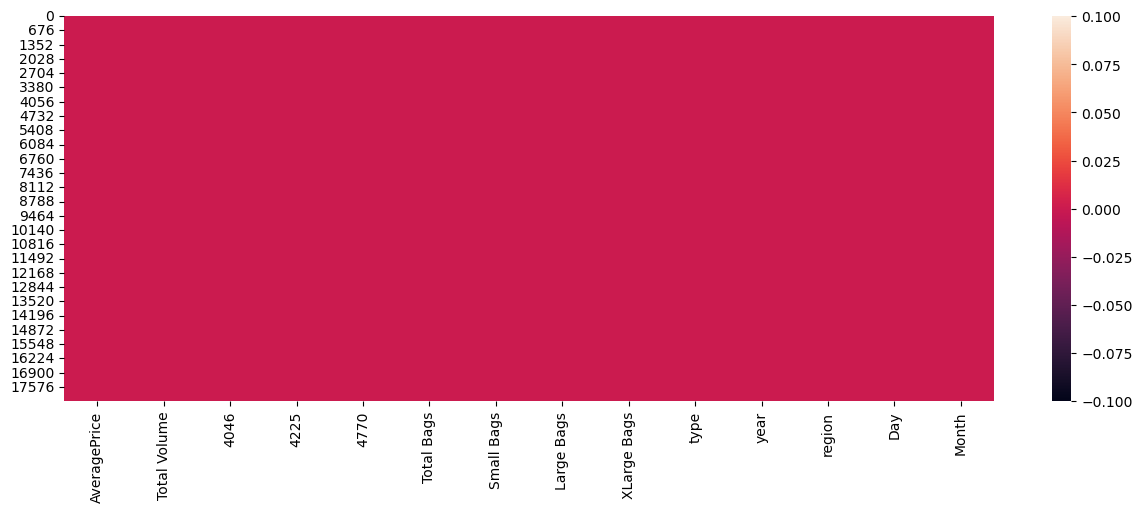

In [19]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

We confirmed that there are no null values in the dataset by looking at the Heat Map.

Now, let's check the uniqueness of the target variable.

In [20]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [21]:
# Now, let's check the value count of the target variable, i.e., 'AveragePrice'

df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [22]:
# Now, let's check whether the dataset contains any space

df.loc[df['AveragePrice']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Day, Month]
Index: []

As we can see, there is no space in the dataset.

### Statistical Description of the Dataset

In [23]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

                Day         Month  
count  18249.000000  18249.000000  
mean      15.662612      6.177215  
std        8.776281      3.534130  
min        1.000000      1.000000  
25%        8.000000      3.000000  
50%       16.000000      6.000000  
75%       23.000000      9.000000  
max       31.000000     12.000000

<AxesSubplot:>

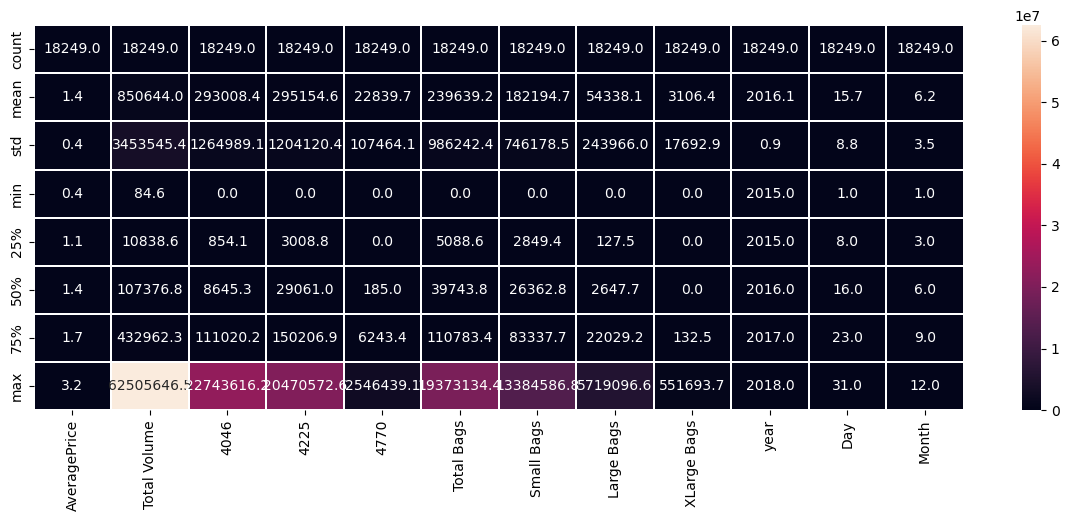

In [24]:
# Now, let's visualize the statistics of the columns using Heatmap

plt.figure(figsize=(15,5))

sns.heatmap(df.describe(), linewidths=0.1, fmt='0.1f', annot=True)

In [25]:
# Checking for categorical columns

categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['type', 'region']


In [26]:
# Checking for numerical columns

numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Day', 'Month']


## Data Visualization

### Univariate Analysis

<b>Now, let's visualize the categorical columns</b>

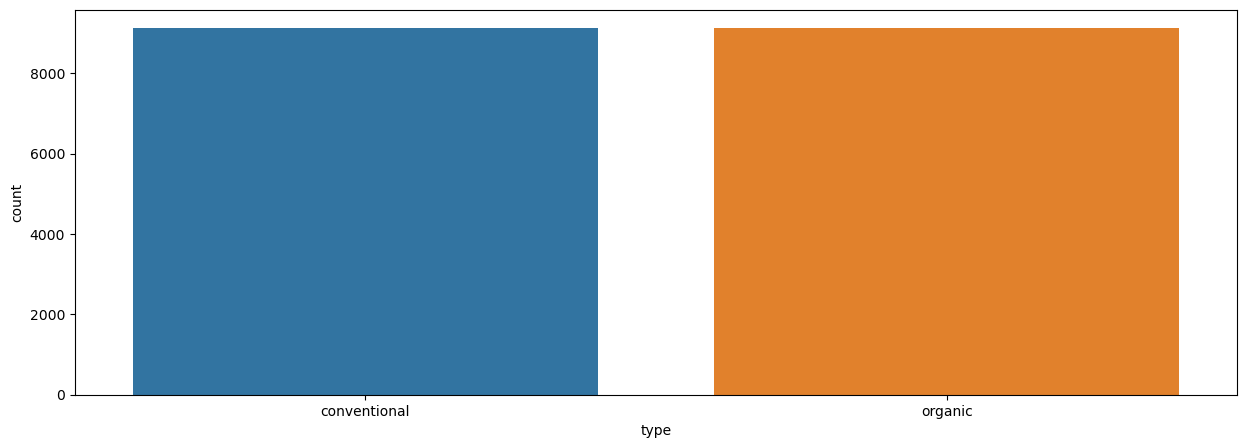

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(df['type']);

<b>Both the unique values in the column 'type', i.e., conventional and organic are equally distributed.</b>

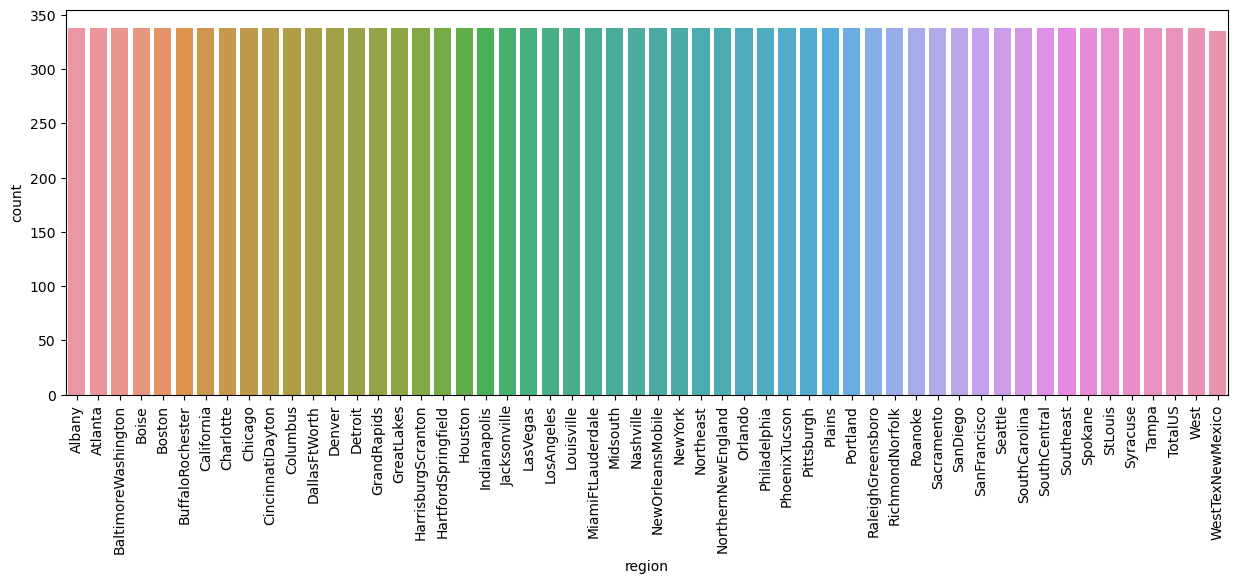

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

<b>The consumption of avocados is the same in all the regions.</b>

### Checking the distribution of data for numerical columns

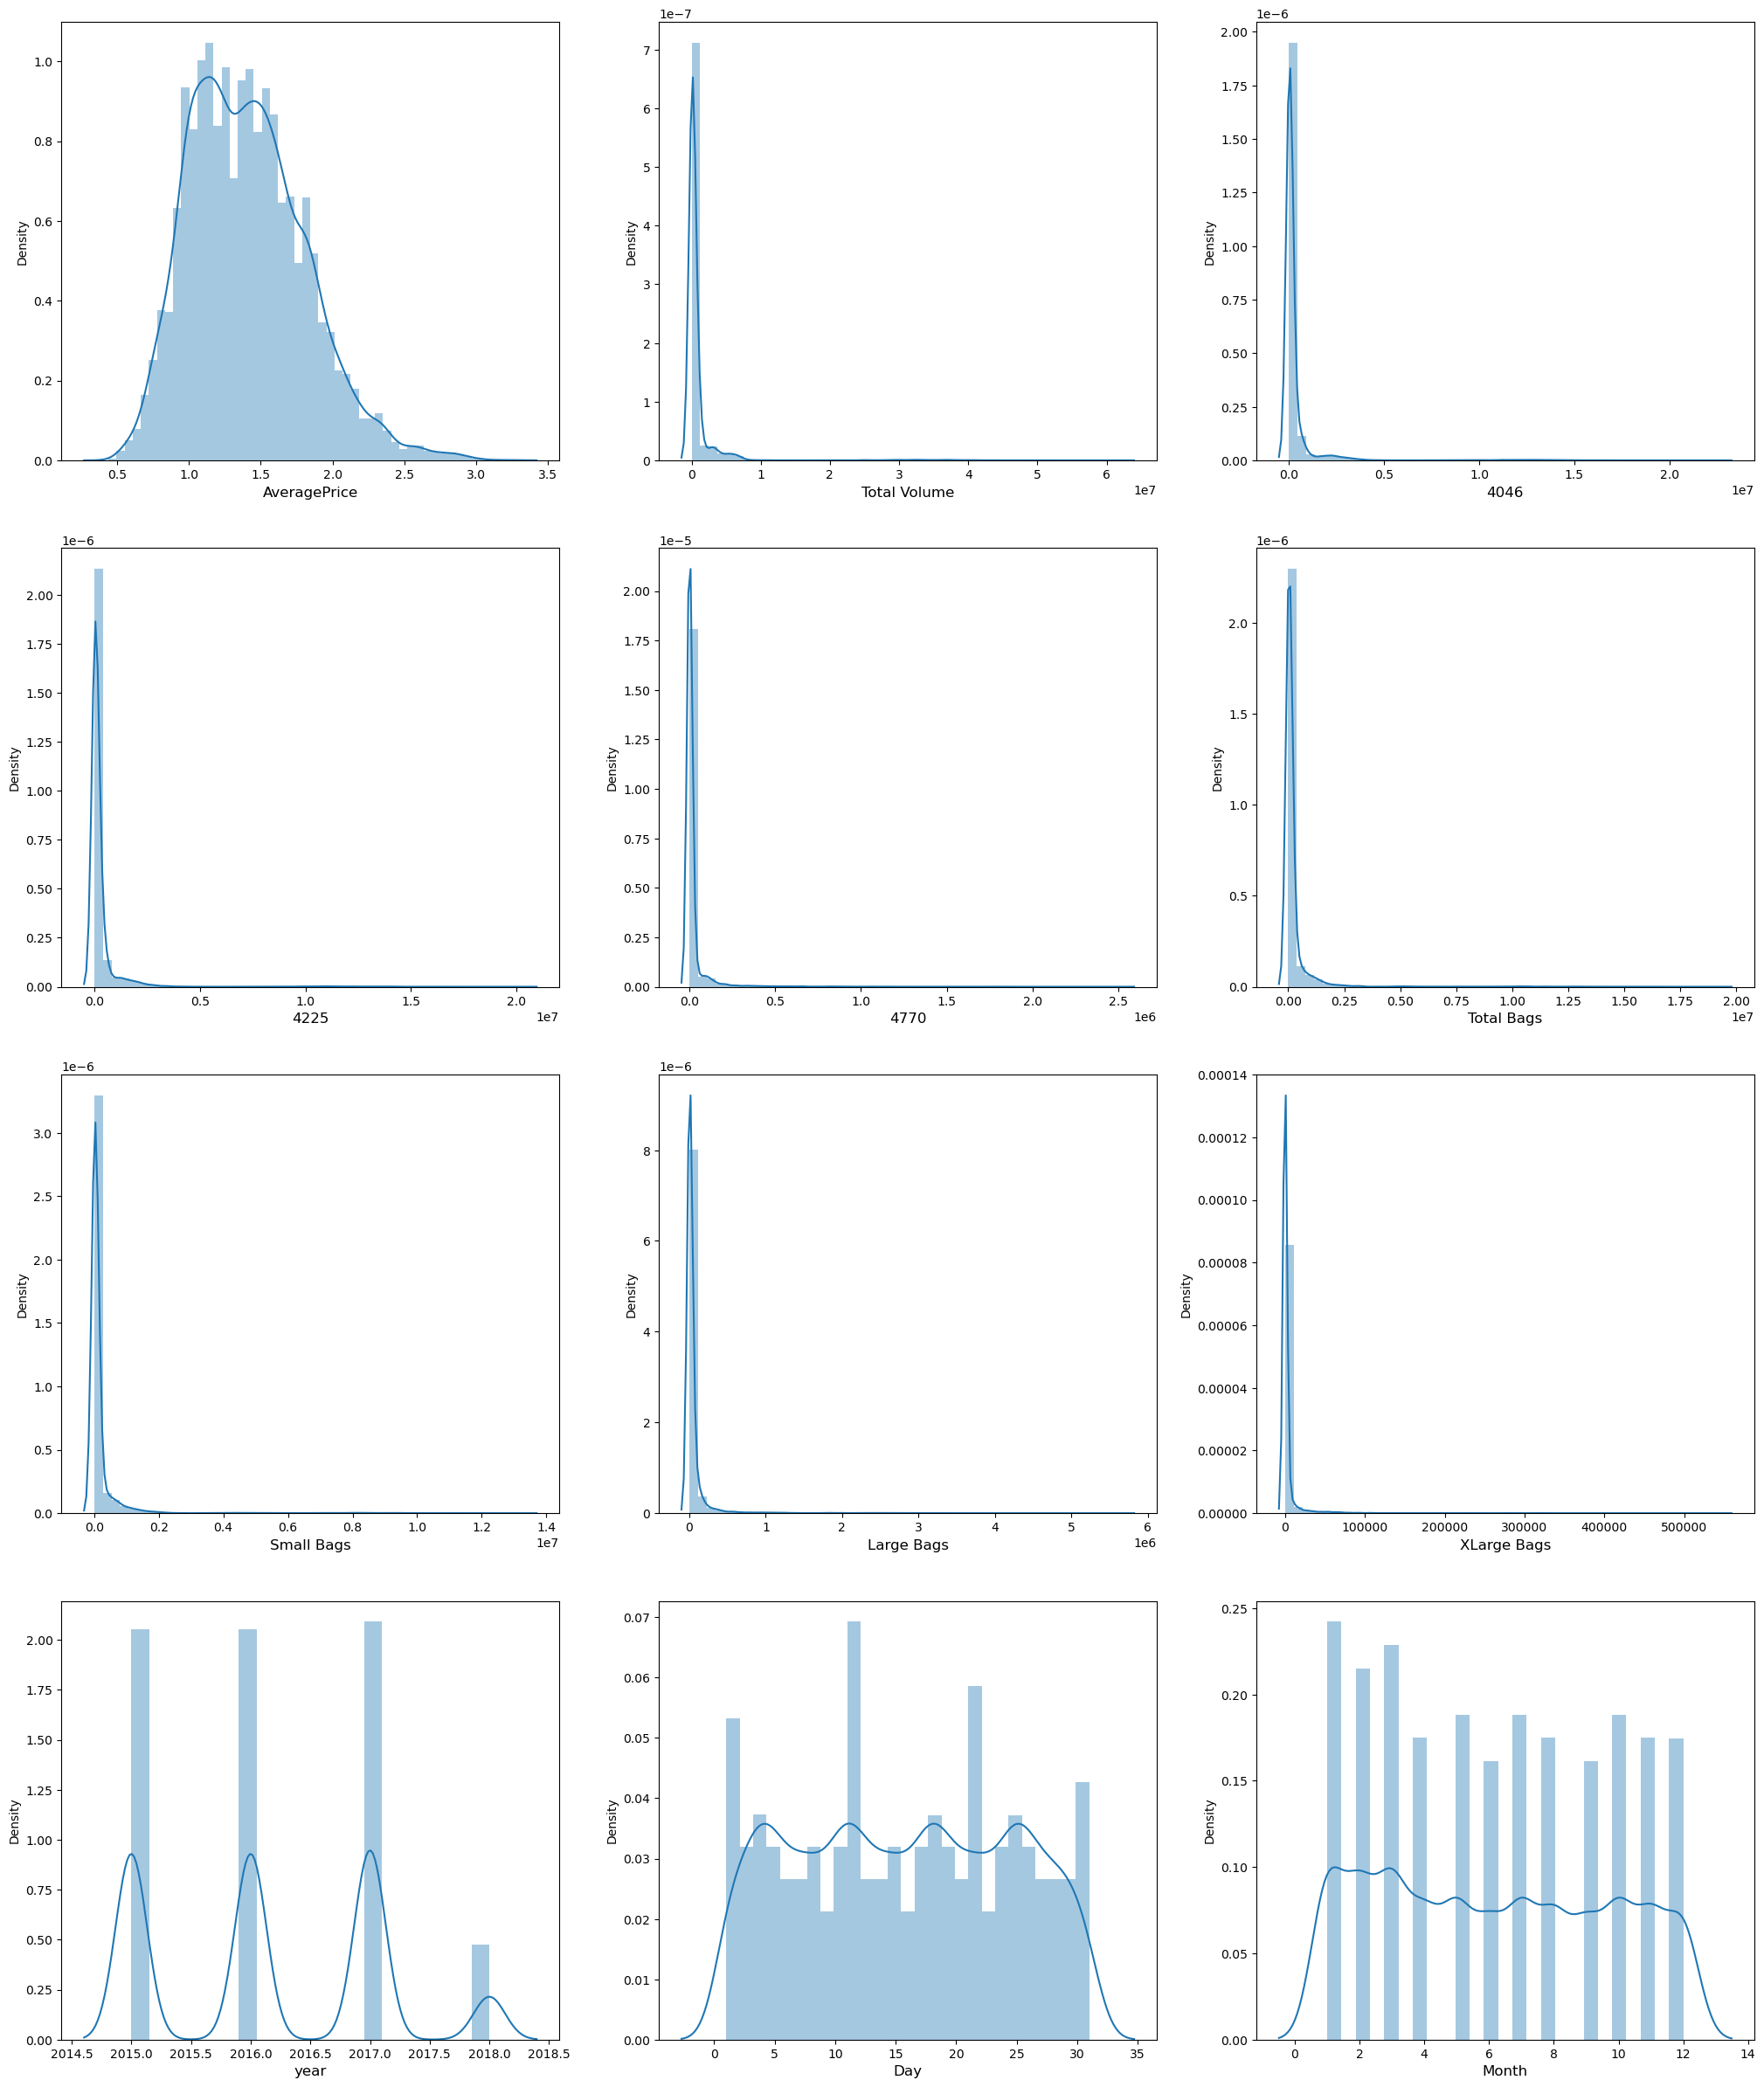

In [29]:
plt.figure(figsize=(25, 30))
plotnumber = 1

for column in numerical_columns:
    if plotnumber<=12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()

### Bivariate Analysis

Text(0, 0.5, 'AveragePrice')

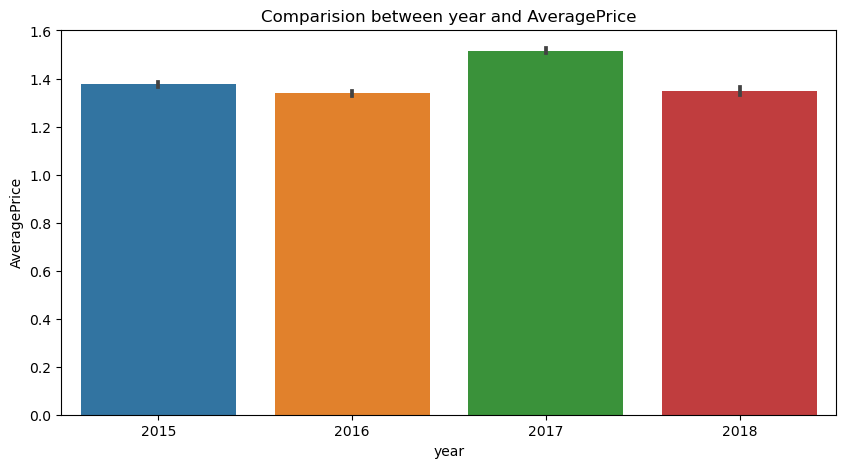

In [30]:
# Checking which year has maximum AveragePrice

plt.figure(figsize=[10,5])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

<b>The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.</b>

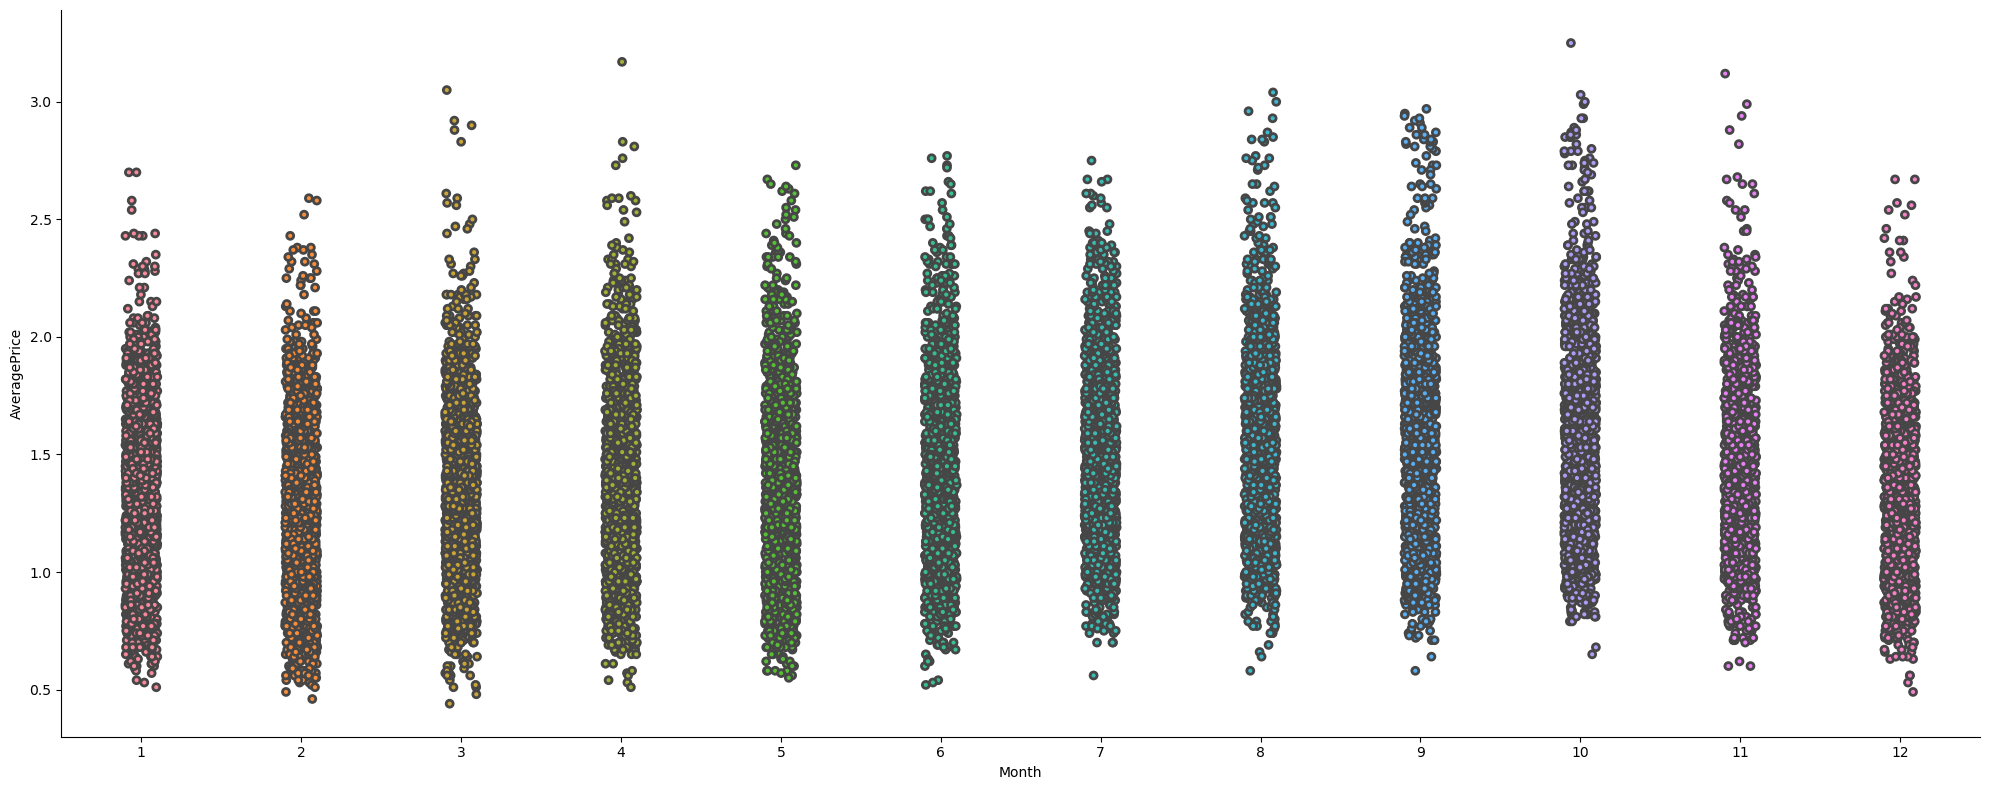

In [31]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

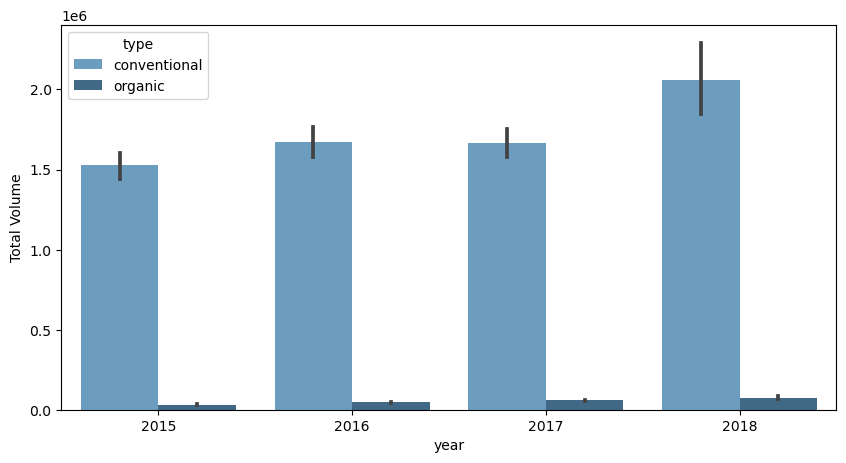

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

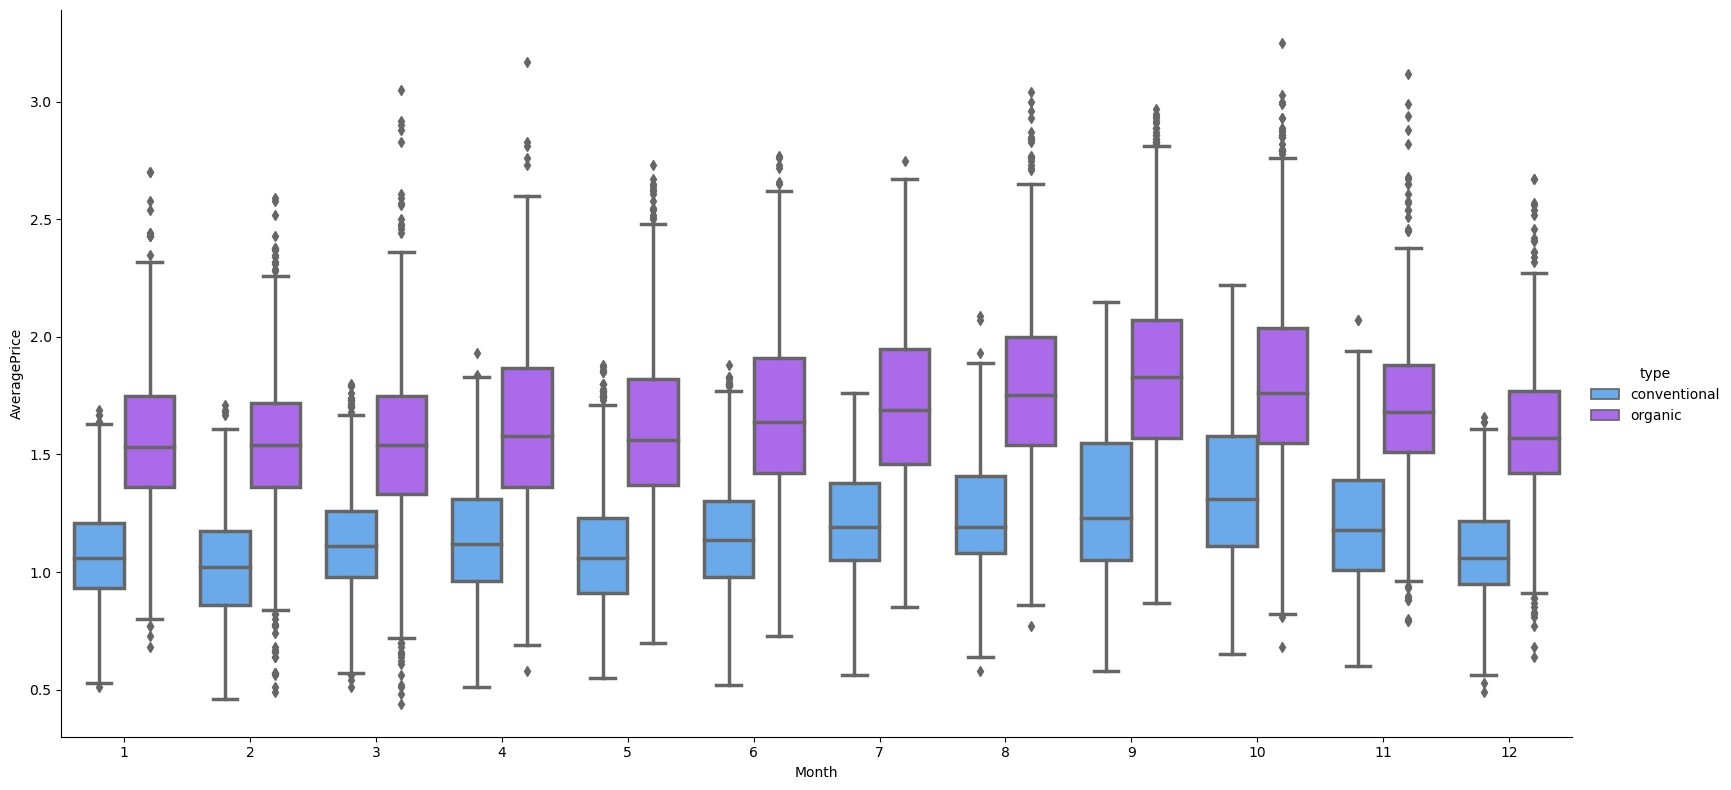

In [33]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="cool");

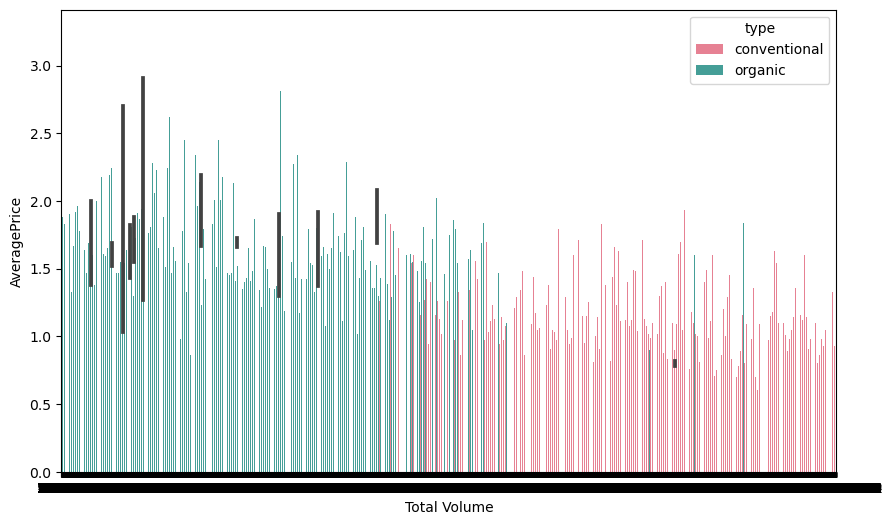

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x="Total Volume", y="AveragePrice", hue="type", data=df, palette="husl")
plt.show()

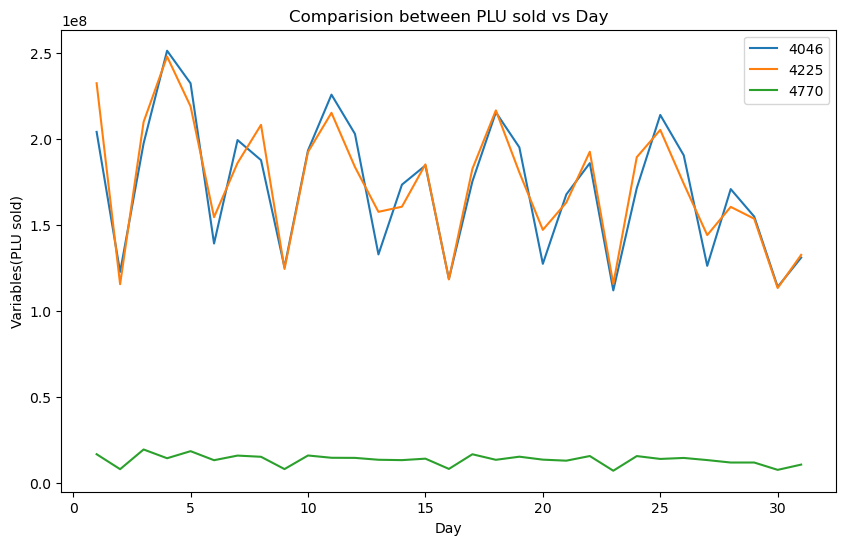

In [35]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

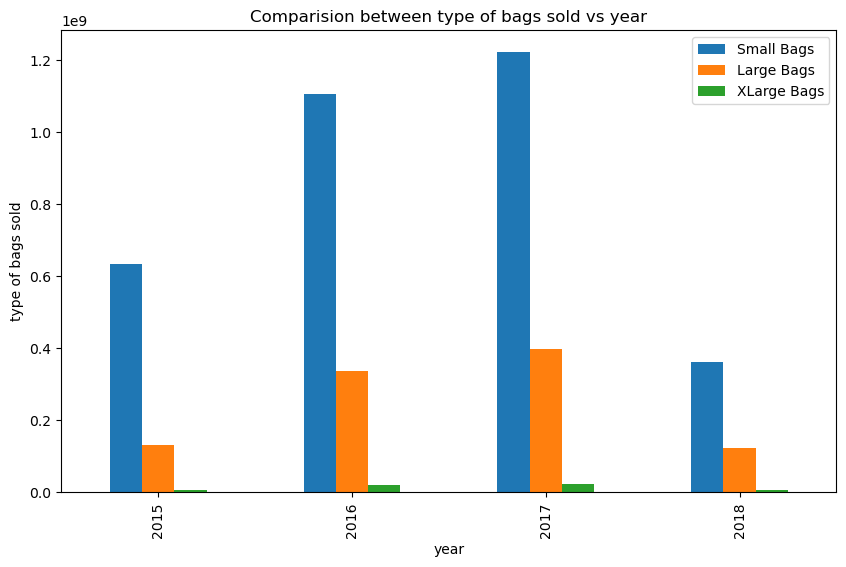

In [36]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

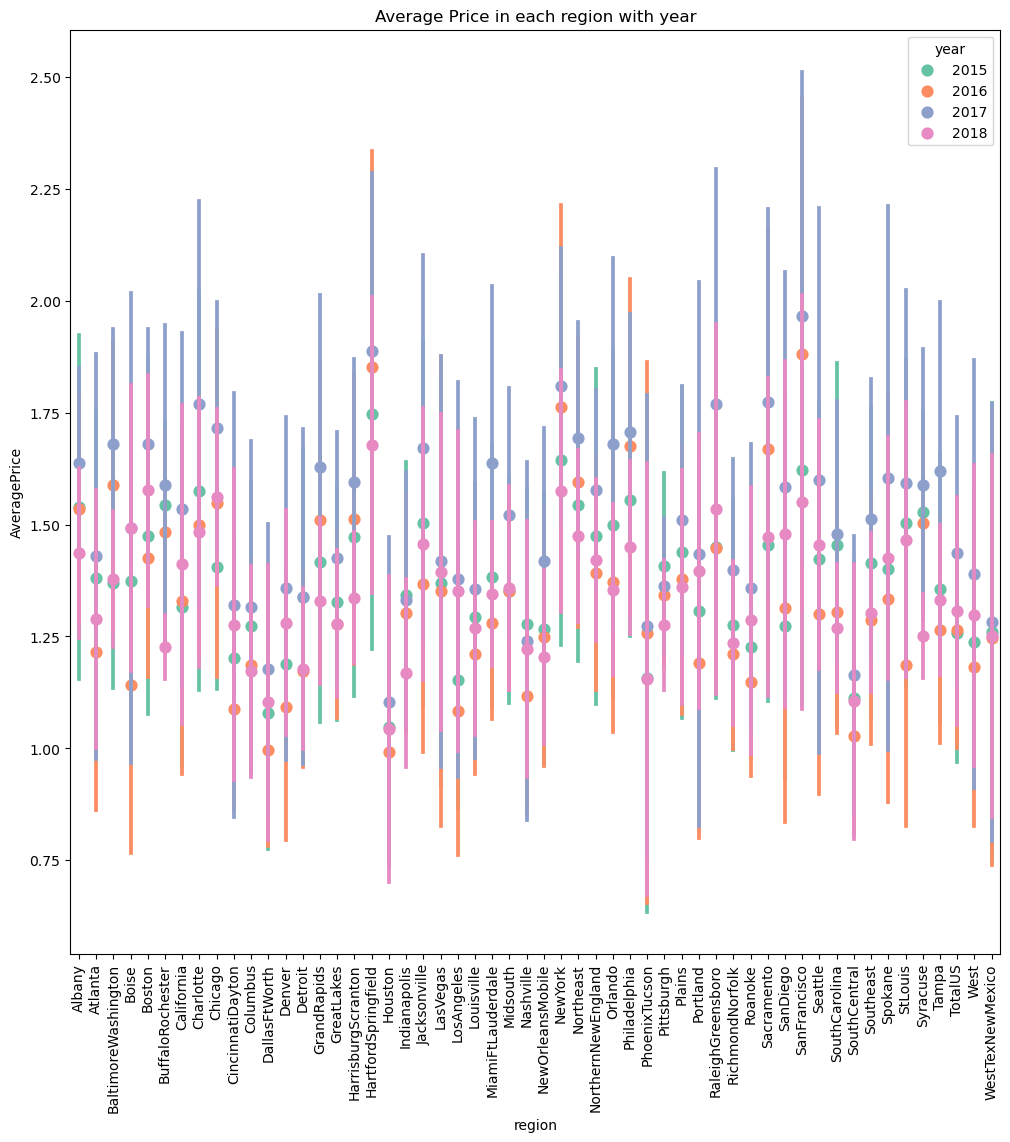

In [37]:
plt.figure(figsize=(12,12))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

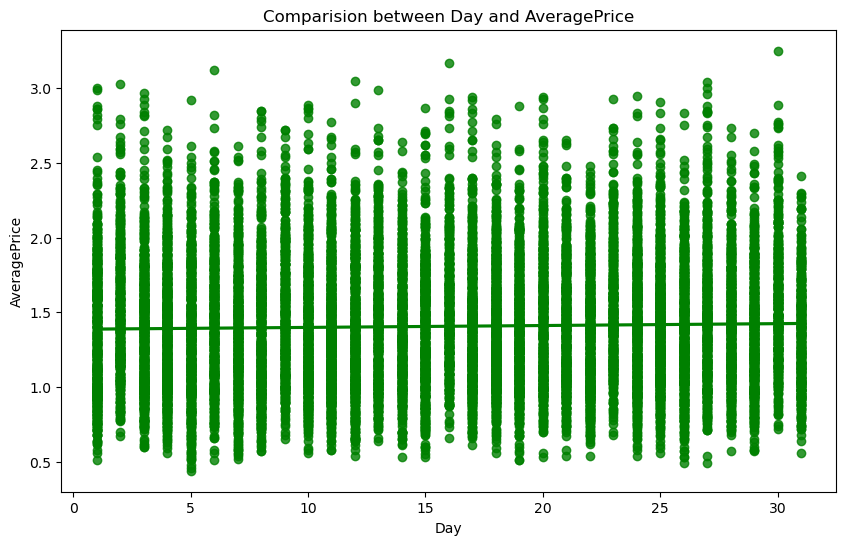

In [38]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Day and AveragePrice')
sns.regplot(df['Day'],df['AveragePrice'],color="g");
plt.show()

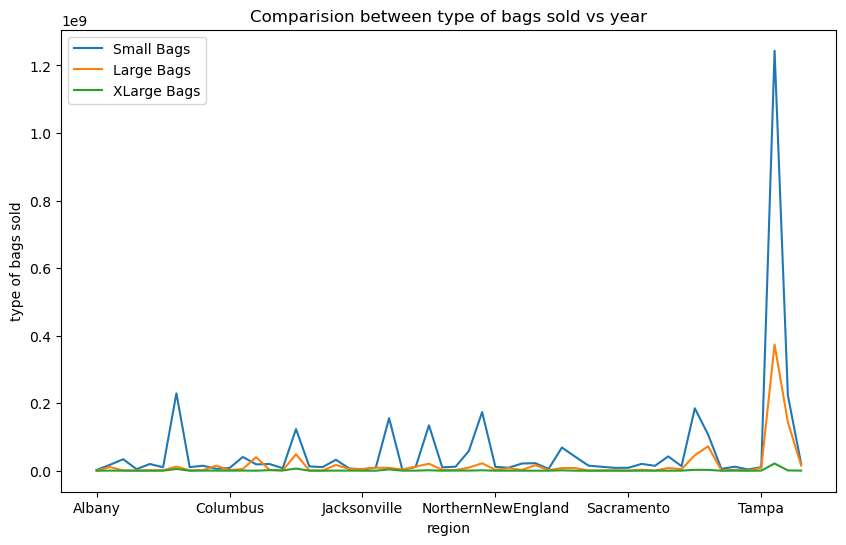

In [39]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

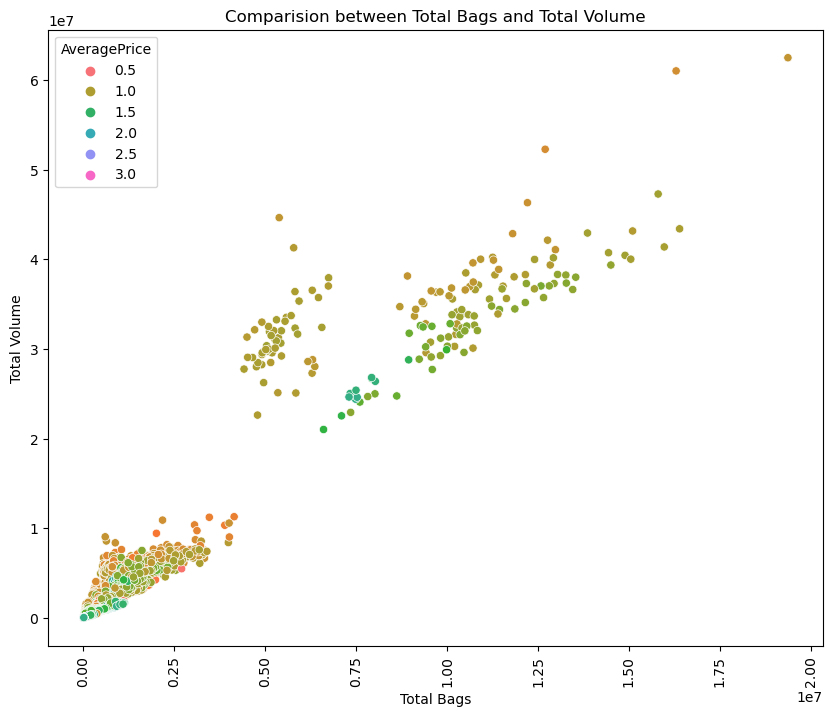

In [40]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

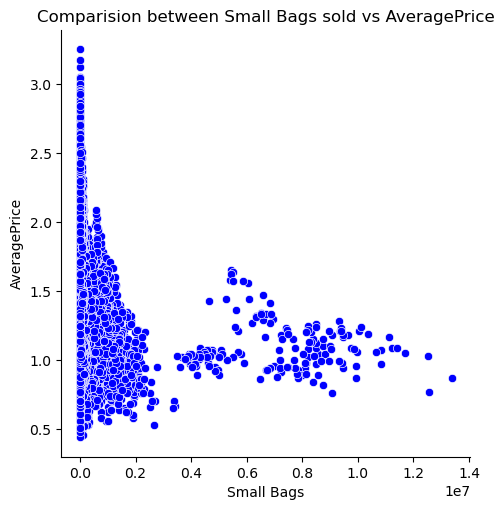

In [41]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="b");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

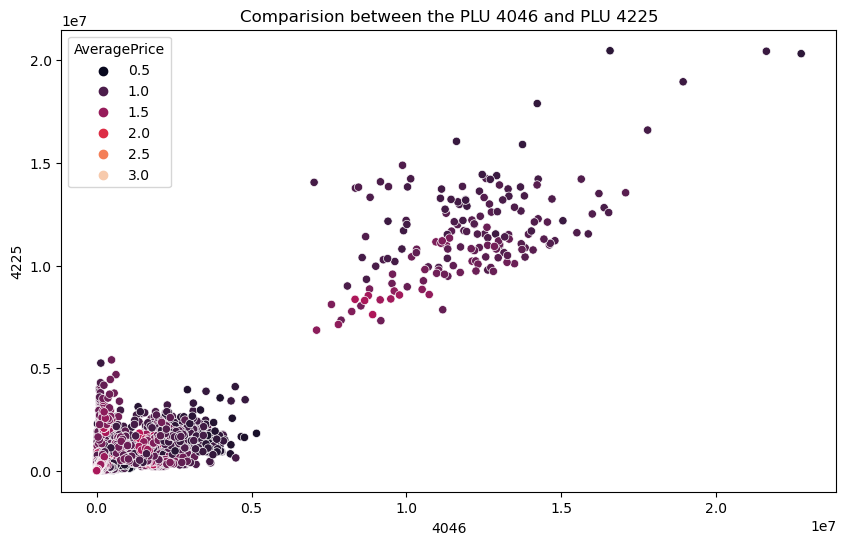

In [42]:
plt.figure(figsize=(10,6))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

<AxesSubplot:title={'center':'Comparison between Total Volume and Average Price'}, xlabel='Total Volume', ylabel='AveragePrice'>

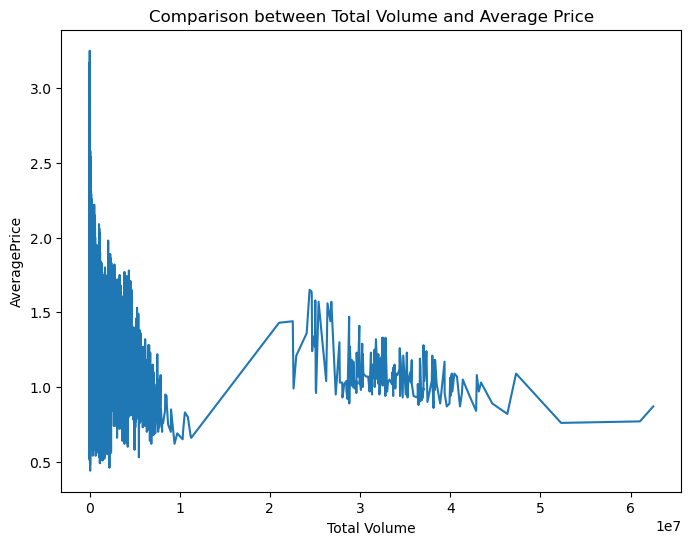

In [43]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Total Volume and Average Price')
sns.lineplot(df['Total Volume'],df['AveragePrice'])

<AxesSubplot:title={'center':'Comparison between AveragePrice and 4046'}, xlabel='AveragePrice', ylabel='4046'>

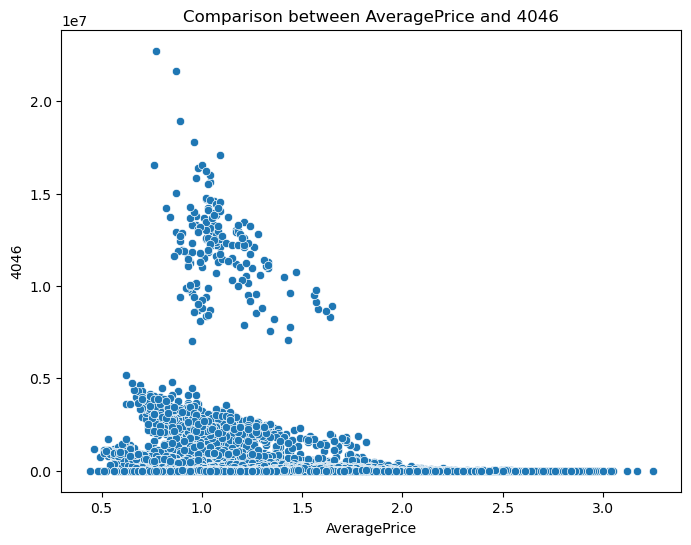

In [44]:
plt.figure(figsize=[8,6])
plt.title('Comparison between AveragePrice and 4046')
sns.scatterplot(df['AveragePrice'],df['4046'])

<AxesSubplot:title={'center':'Comparison between Average Price and 4225'}, xlabel='AveragePrice', ylabel='4225'>

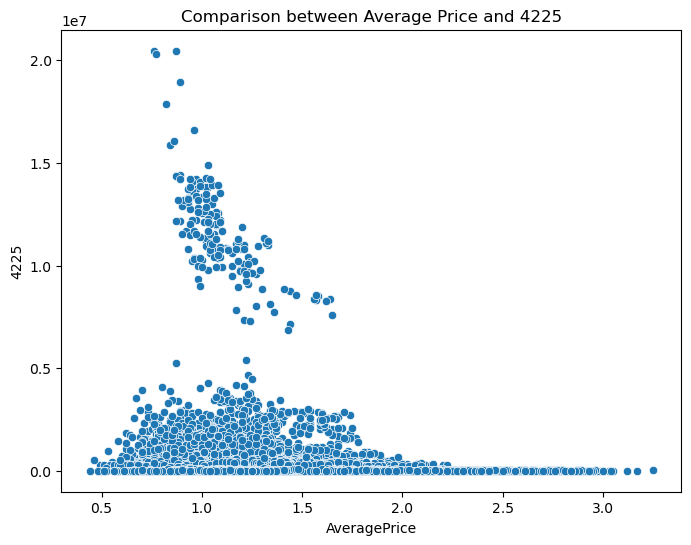

In [45]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Average Price and 4225')
sns.scatterplot(df['AveragePrice'],df['4225'])

<AxesSubplot:title={'center':'Comparison between Average Price and 4770'}, xlabel='AveragePrice', ylabel='4770'>

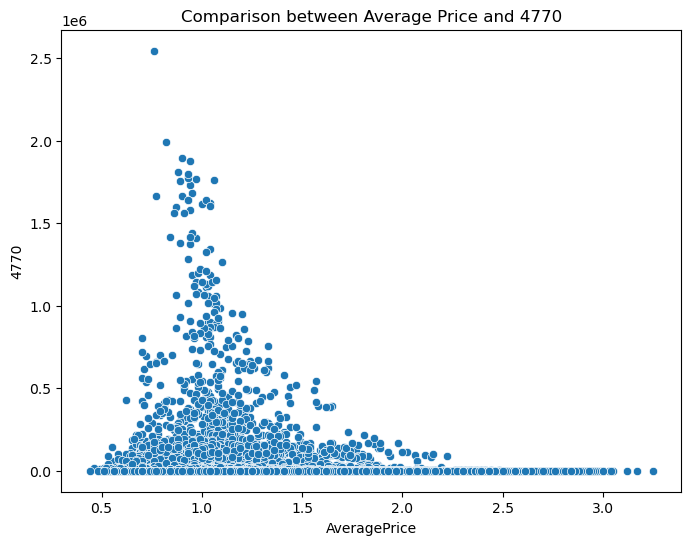

In [46]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Average Price and 4770')
sns.scatterplot(df['AveragePrice'],df['4770'])

<AxesSubplot:title={'center':'Comparison between Average Price and Total Bags'}, xlabel='AveragePrice', ylabel='Total Bags'>

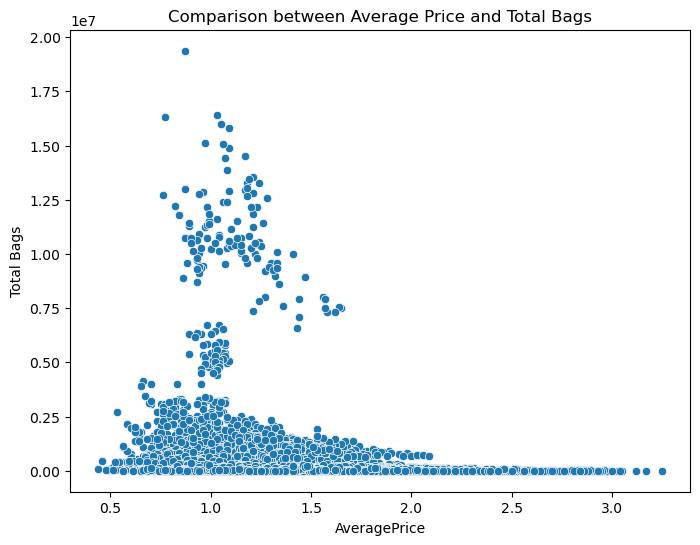

In [47]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Average Price and Total Bags')
sns.scatterplot(df['AveragePrice'],df['Total Bags'])

<AxesSubplot:title={'center':'Comparison between AveragePrice and Small Bags'}, xlabel='AveragePrice', ylabel='Small Bags'>

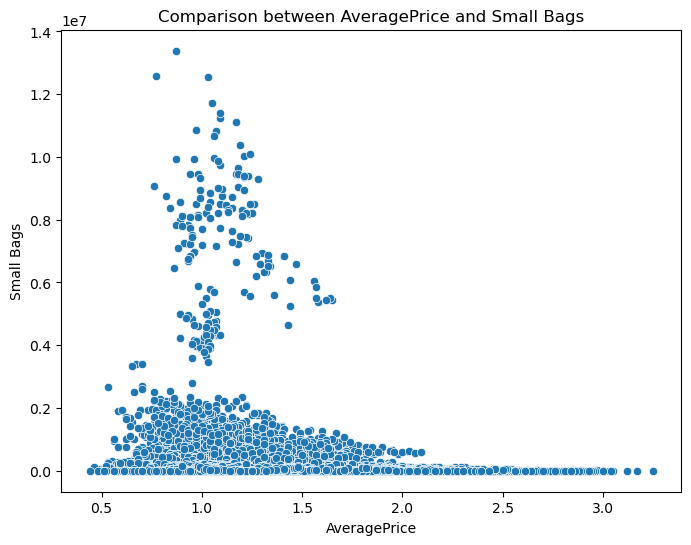

In [48]:
plt.figure(figsize=[8,6])
plt.title('Comparison between AveragePrice and Small Bags')
sns.scatterplot(df['AveragePrice'],df['Small Bags'])

<AxesSubplot:title={'center':'Comparison between Average Price and XLarge Bags '}, xlabel='AveragePrice', ylabel='XLarge Bags'>

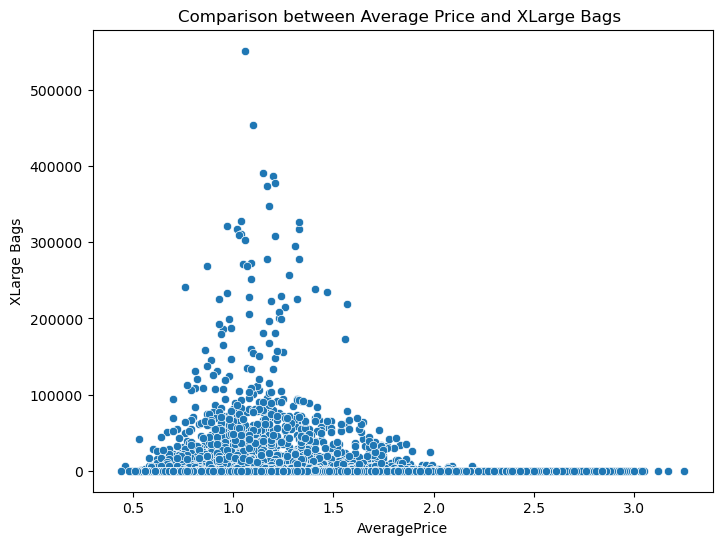

In [49]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Average Price and XLarge Bags ')
sns.scatterplot(df['AveragePrice'],df['XLarge Bags'])

<AxesSubplot:title={'center':'Comparison between type and AveragePrice'}, xlabel='type', ylabel='AveragePrice'>

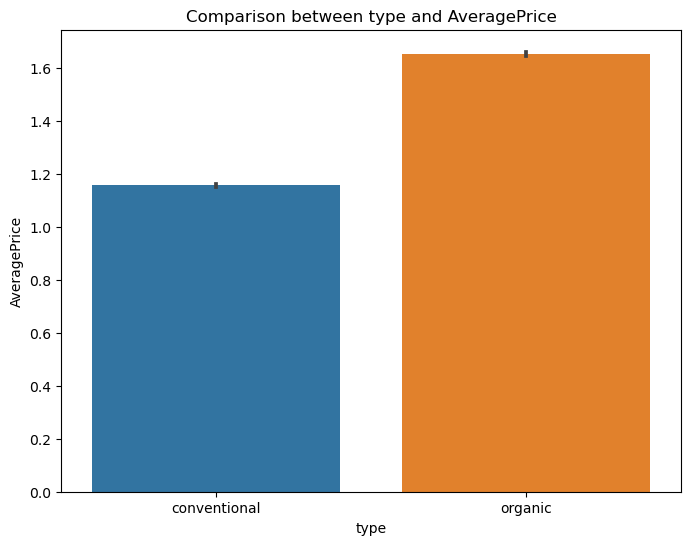

In [50]:
plt.figure(figsize=[8,6])
plt.title('Comparison between type and AveragePrice')
sns.barplot(df['type'],df['AveragePrice'])

Text(0, 0.5, 'Average Price')

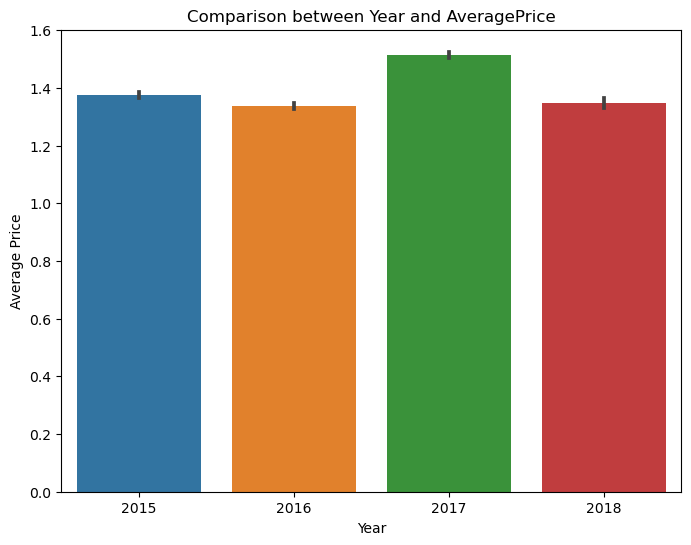

In [51]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'])
plt.xlabel('Year')
plt.ylabel('Average Price')

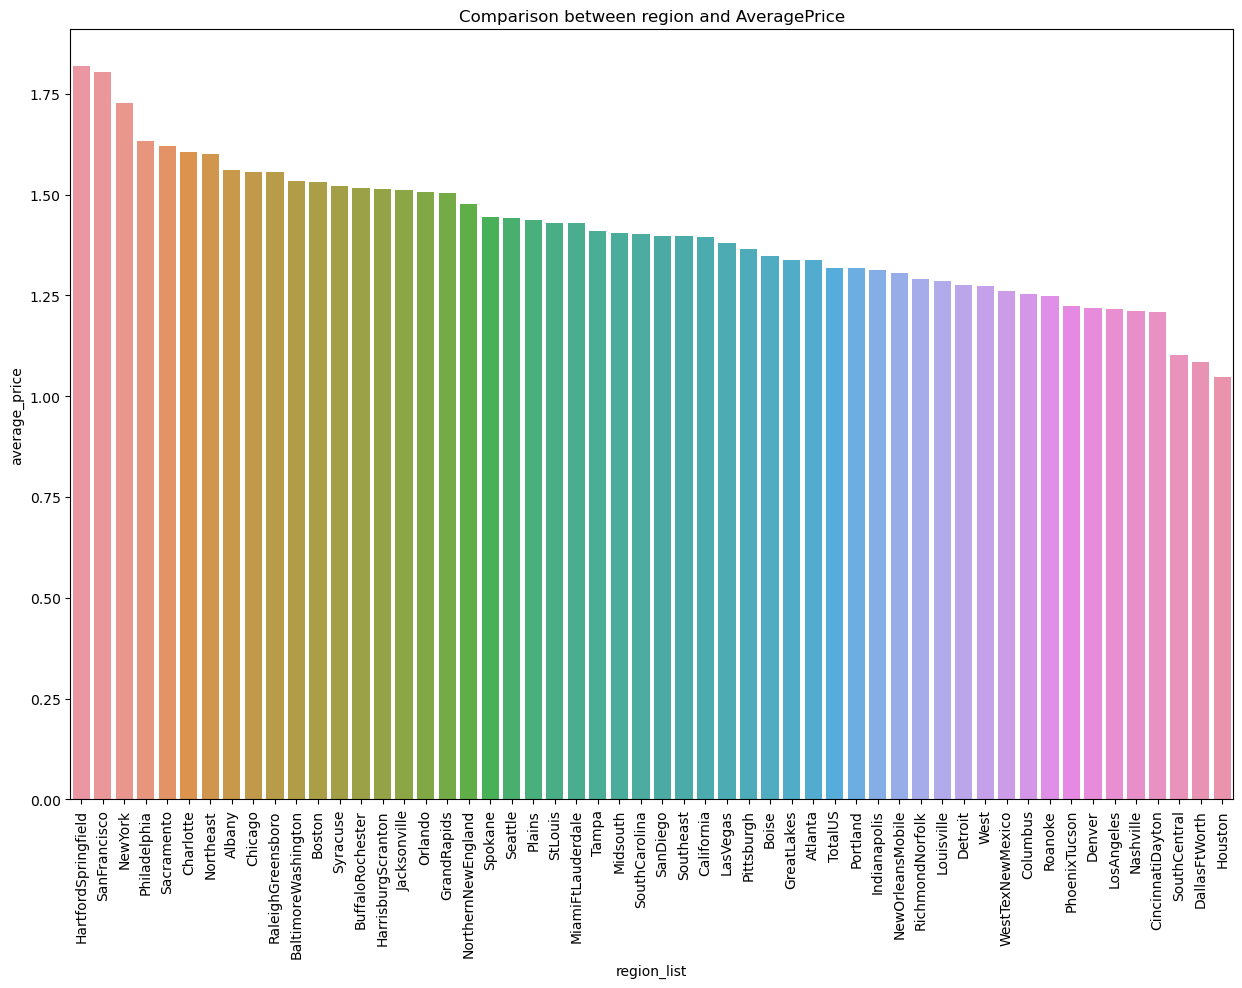

In [52]:
region_list = list(df.region.unique())
average_price = []

for i in region_list:
    x = df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1 = pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index = df1.average_price.sort_values(ascending=False).index.values
sorted_data = df1.reindex(new_index)


plt.figure(figsize=[15,10])
plt.title('Comparison between region and AveragePrice')
sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)
plt.xticks(rotation=90)
plt.show()

<b>From the scatterplot above, we can see that the average price of avocados is the highest in these regions HartfordSpringfield, SanFrancisco and NewYork.</b>

Text(0, 0.5, 'Average Price')

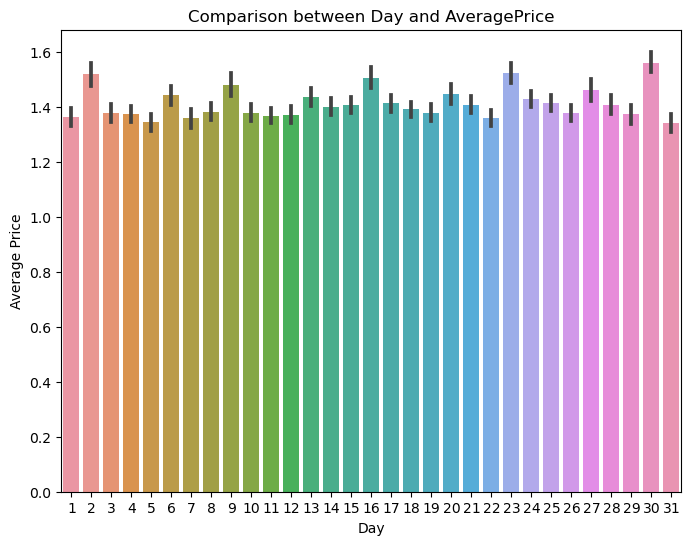

In [53]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Day and AveragePrice')
sns.barplot(df['Day'],df['AveragePrice'])
plt.xlabel('Day')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

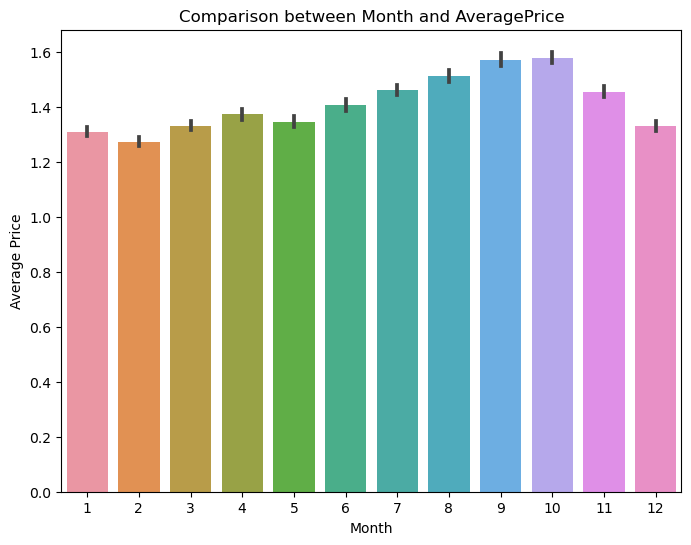

In [54]:
plt.figure(figsize=[8,6])
plt.title('Comparison between Month and AveragePrice')
sns.barplot(df['Month'],df['AveragePrice'])
plt.xlabel('Month')
plt.ylabel('Average Price')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

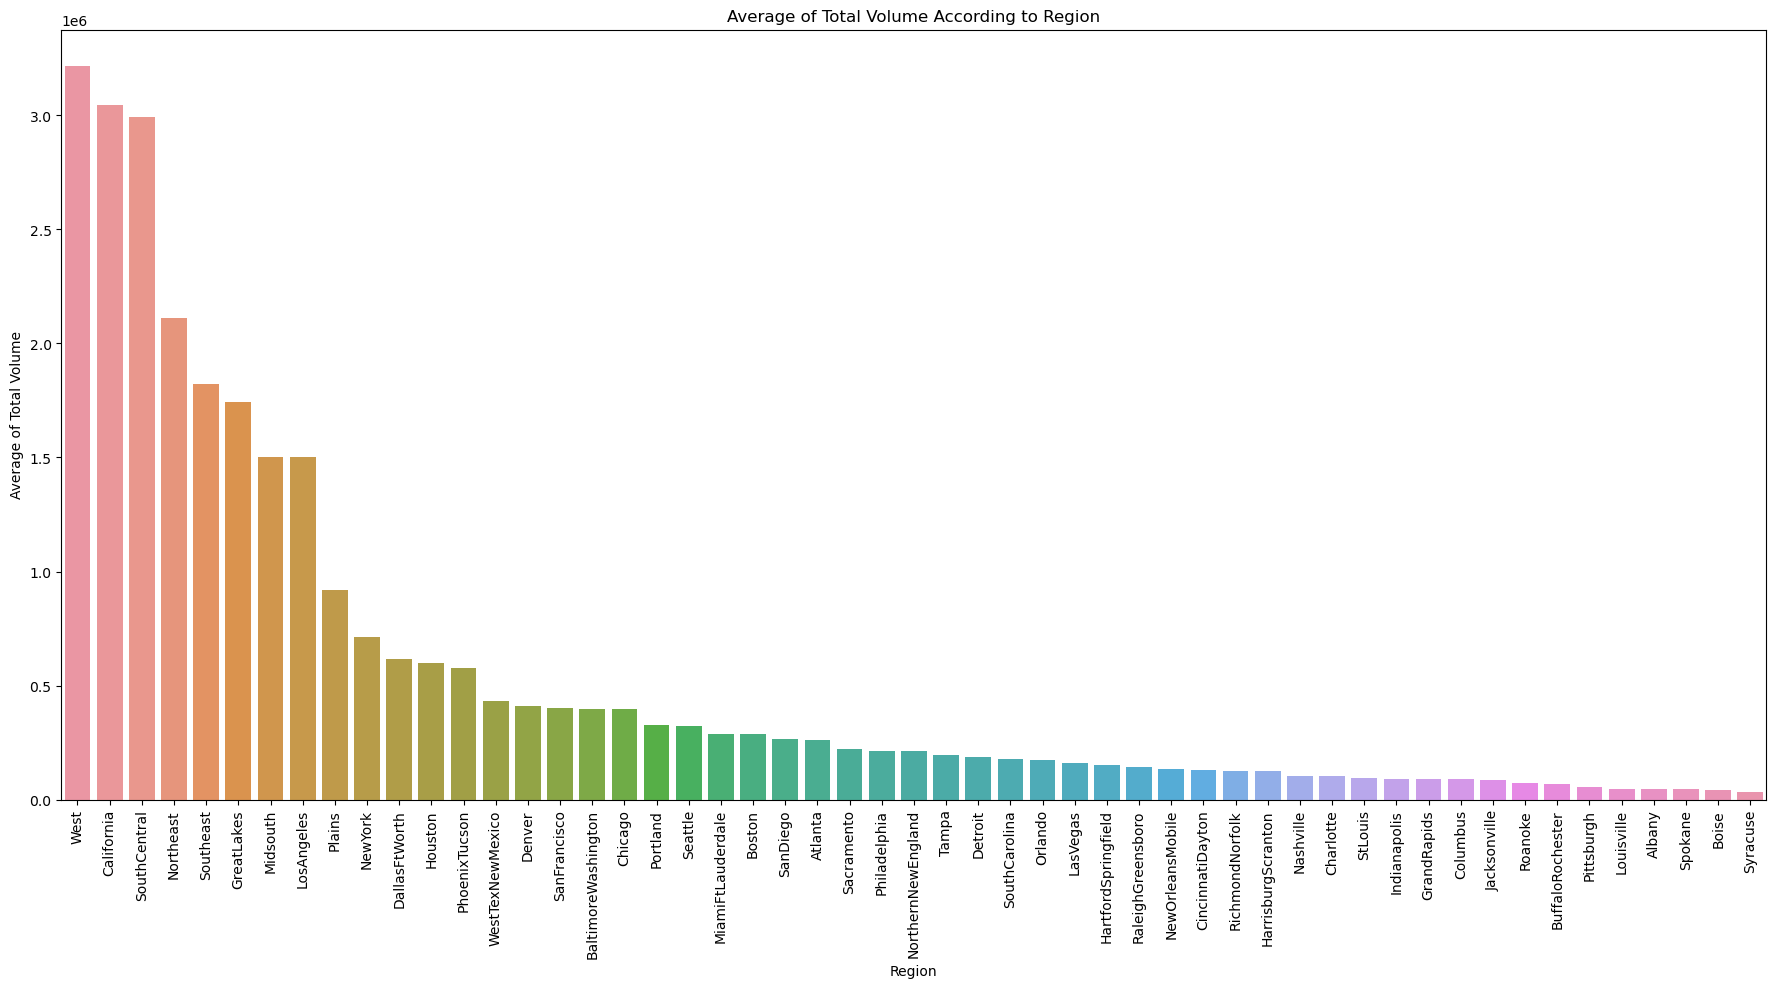

In [55]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

### Multivariate Analysis

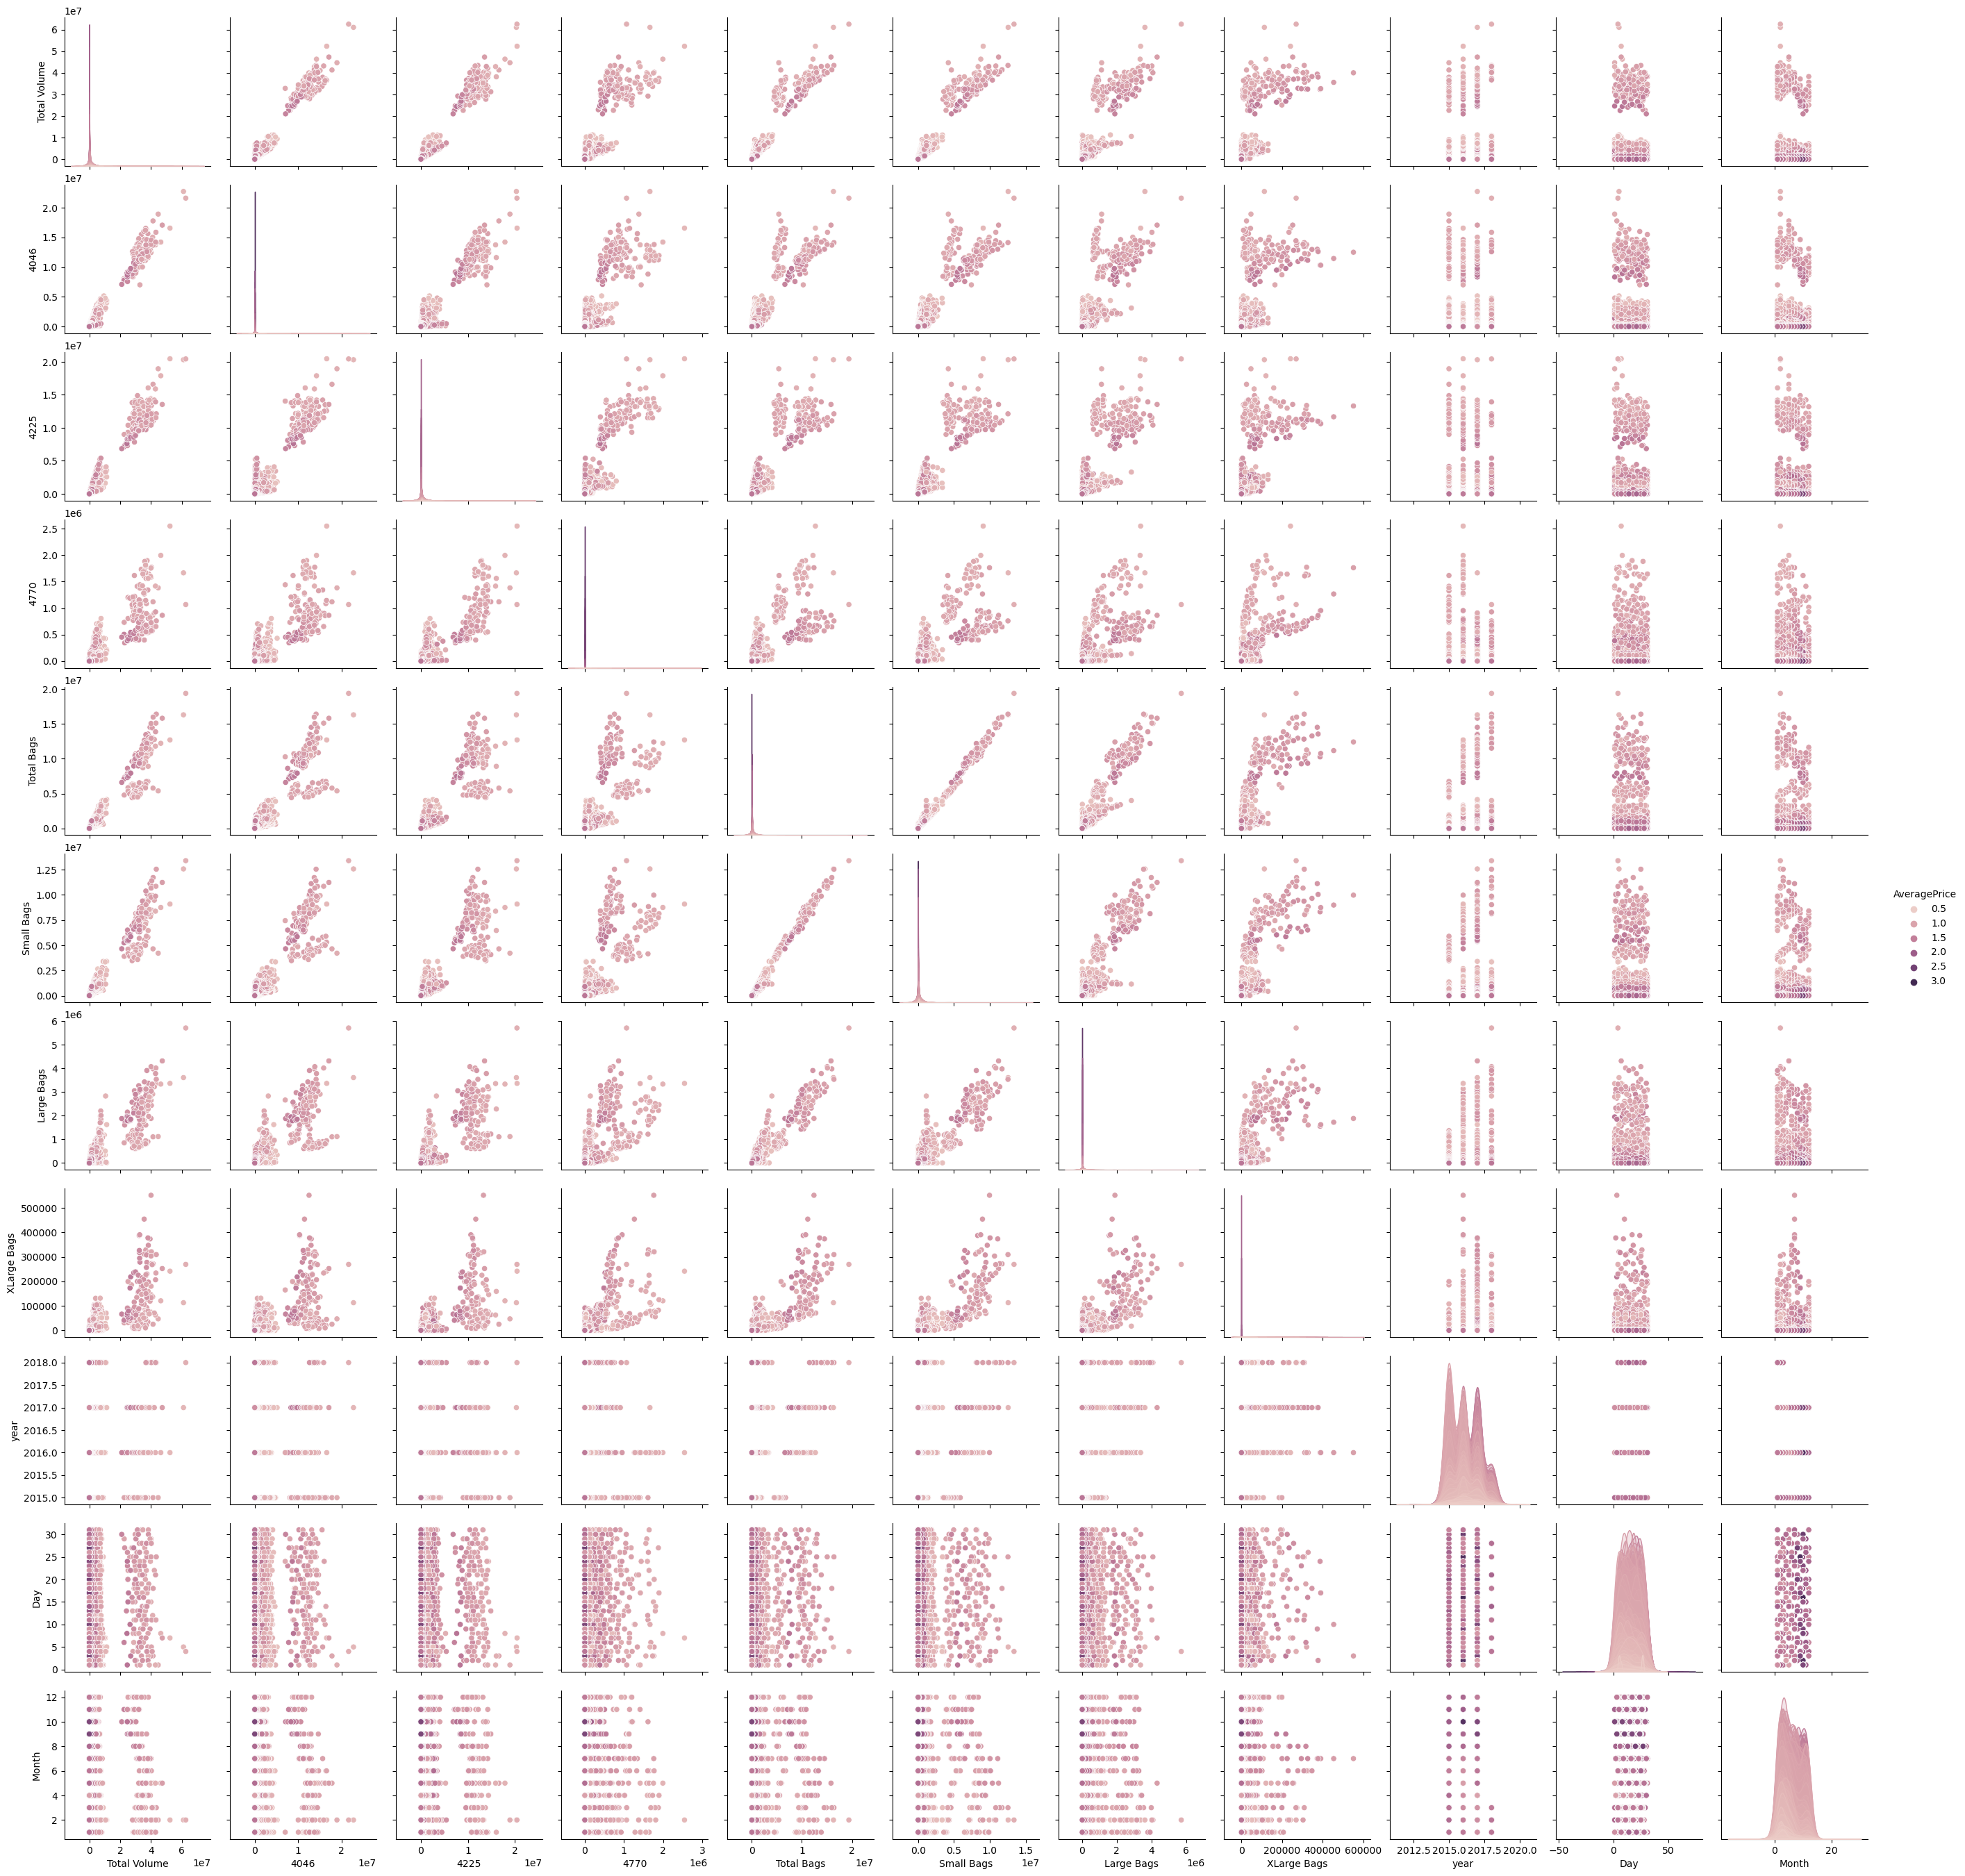

In [56]:
sns.pairplot(df, hue='AveragePrice')

### Outliers Detection

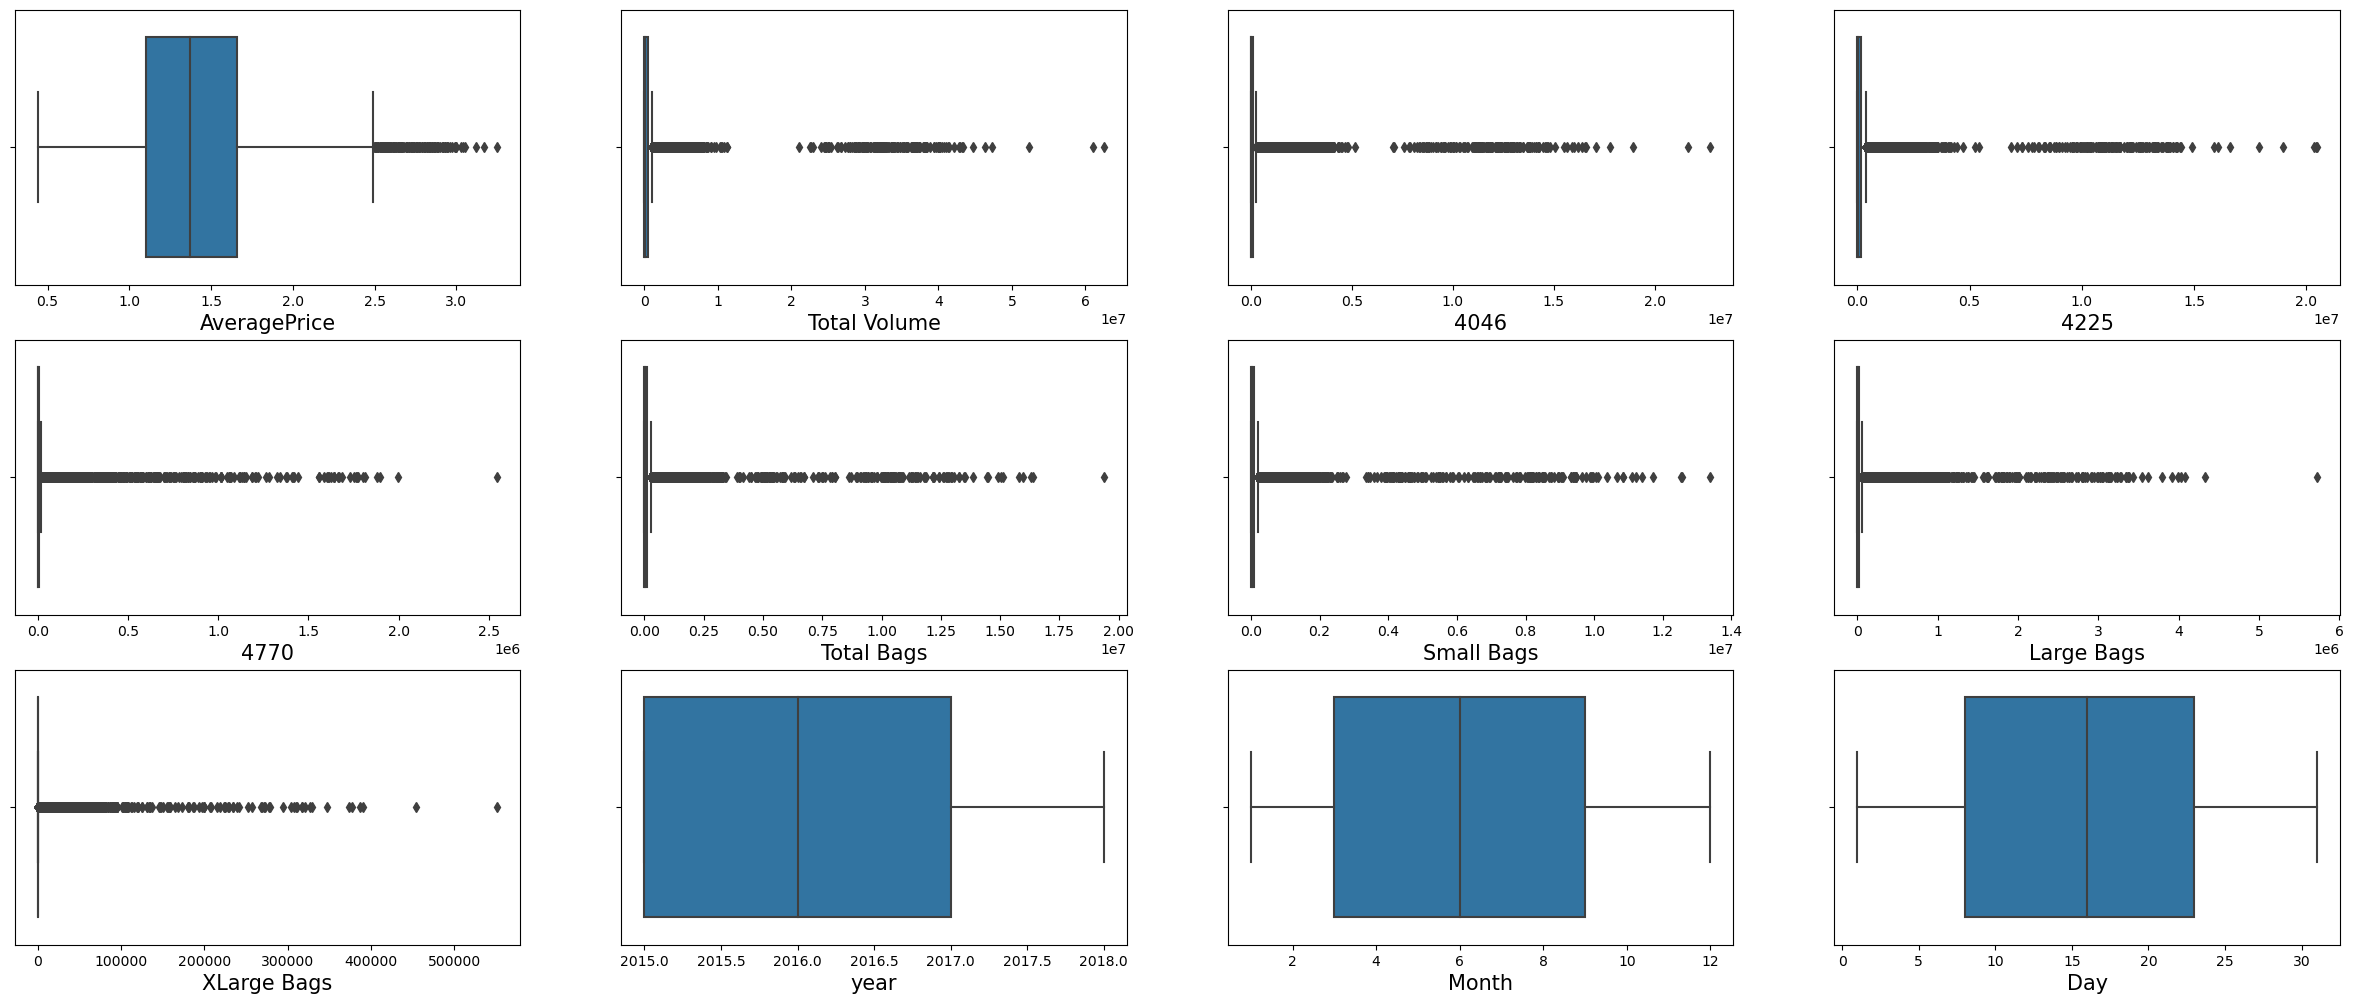

In [57]:
numerical_columns = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']

plt.figure(figsize=(30,25))
plotnumber=1

for column in numerical_columns:
    if plotnumber<=14:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()

In [32]:
# Features containing outliers

features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [33]:
from scipy.stats import zscore

z = np.abs(zscore(features))
z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [34]:
# Now, let's create a new dataframe

df_new = df[(z<3).all(axis=1)]
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[17782 rows x 14 columns]

In [35]:
print(df.shape) 
print(df_new.shape) 

(18249, 14)
(17782, 14)


### Percentage data loss

In [36]:
loss_percent = (18249-17782)/18249*100
print(loss_percent, '%')

2.55904433119623 %


In [37]:
df_new.shape

(17782, 14)

### Checking for Skewness

In [38]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

<b>The columns which do not lie in the range of +/-0.5 are 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags' and 'XLarge Bags'. Thus, skewness is present in these columns.</b>

<b>Skewness is not present in the columns 'year', 'Day' and 'Month'.</b>

### Removing Skewness using yeo-johnson method

In [39]:
skewed_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

In [40]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

In [41]:
df_new[skewed_features] = scaler.fit_transform(df_new[skewed_features].values)
df_new[skewed_features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [42]:
# Now, let's check the skewness again after applying yeo-johnson method

df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

In [43]:
#Removing skewness in the colun 'XLarge Bags' using log transformation

df_new['XLarge Bags'] = np.log1p(df_new['XLarge Bags'])

In [44]:
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

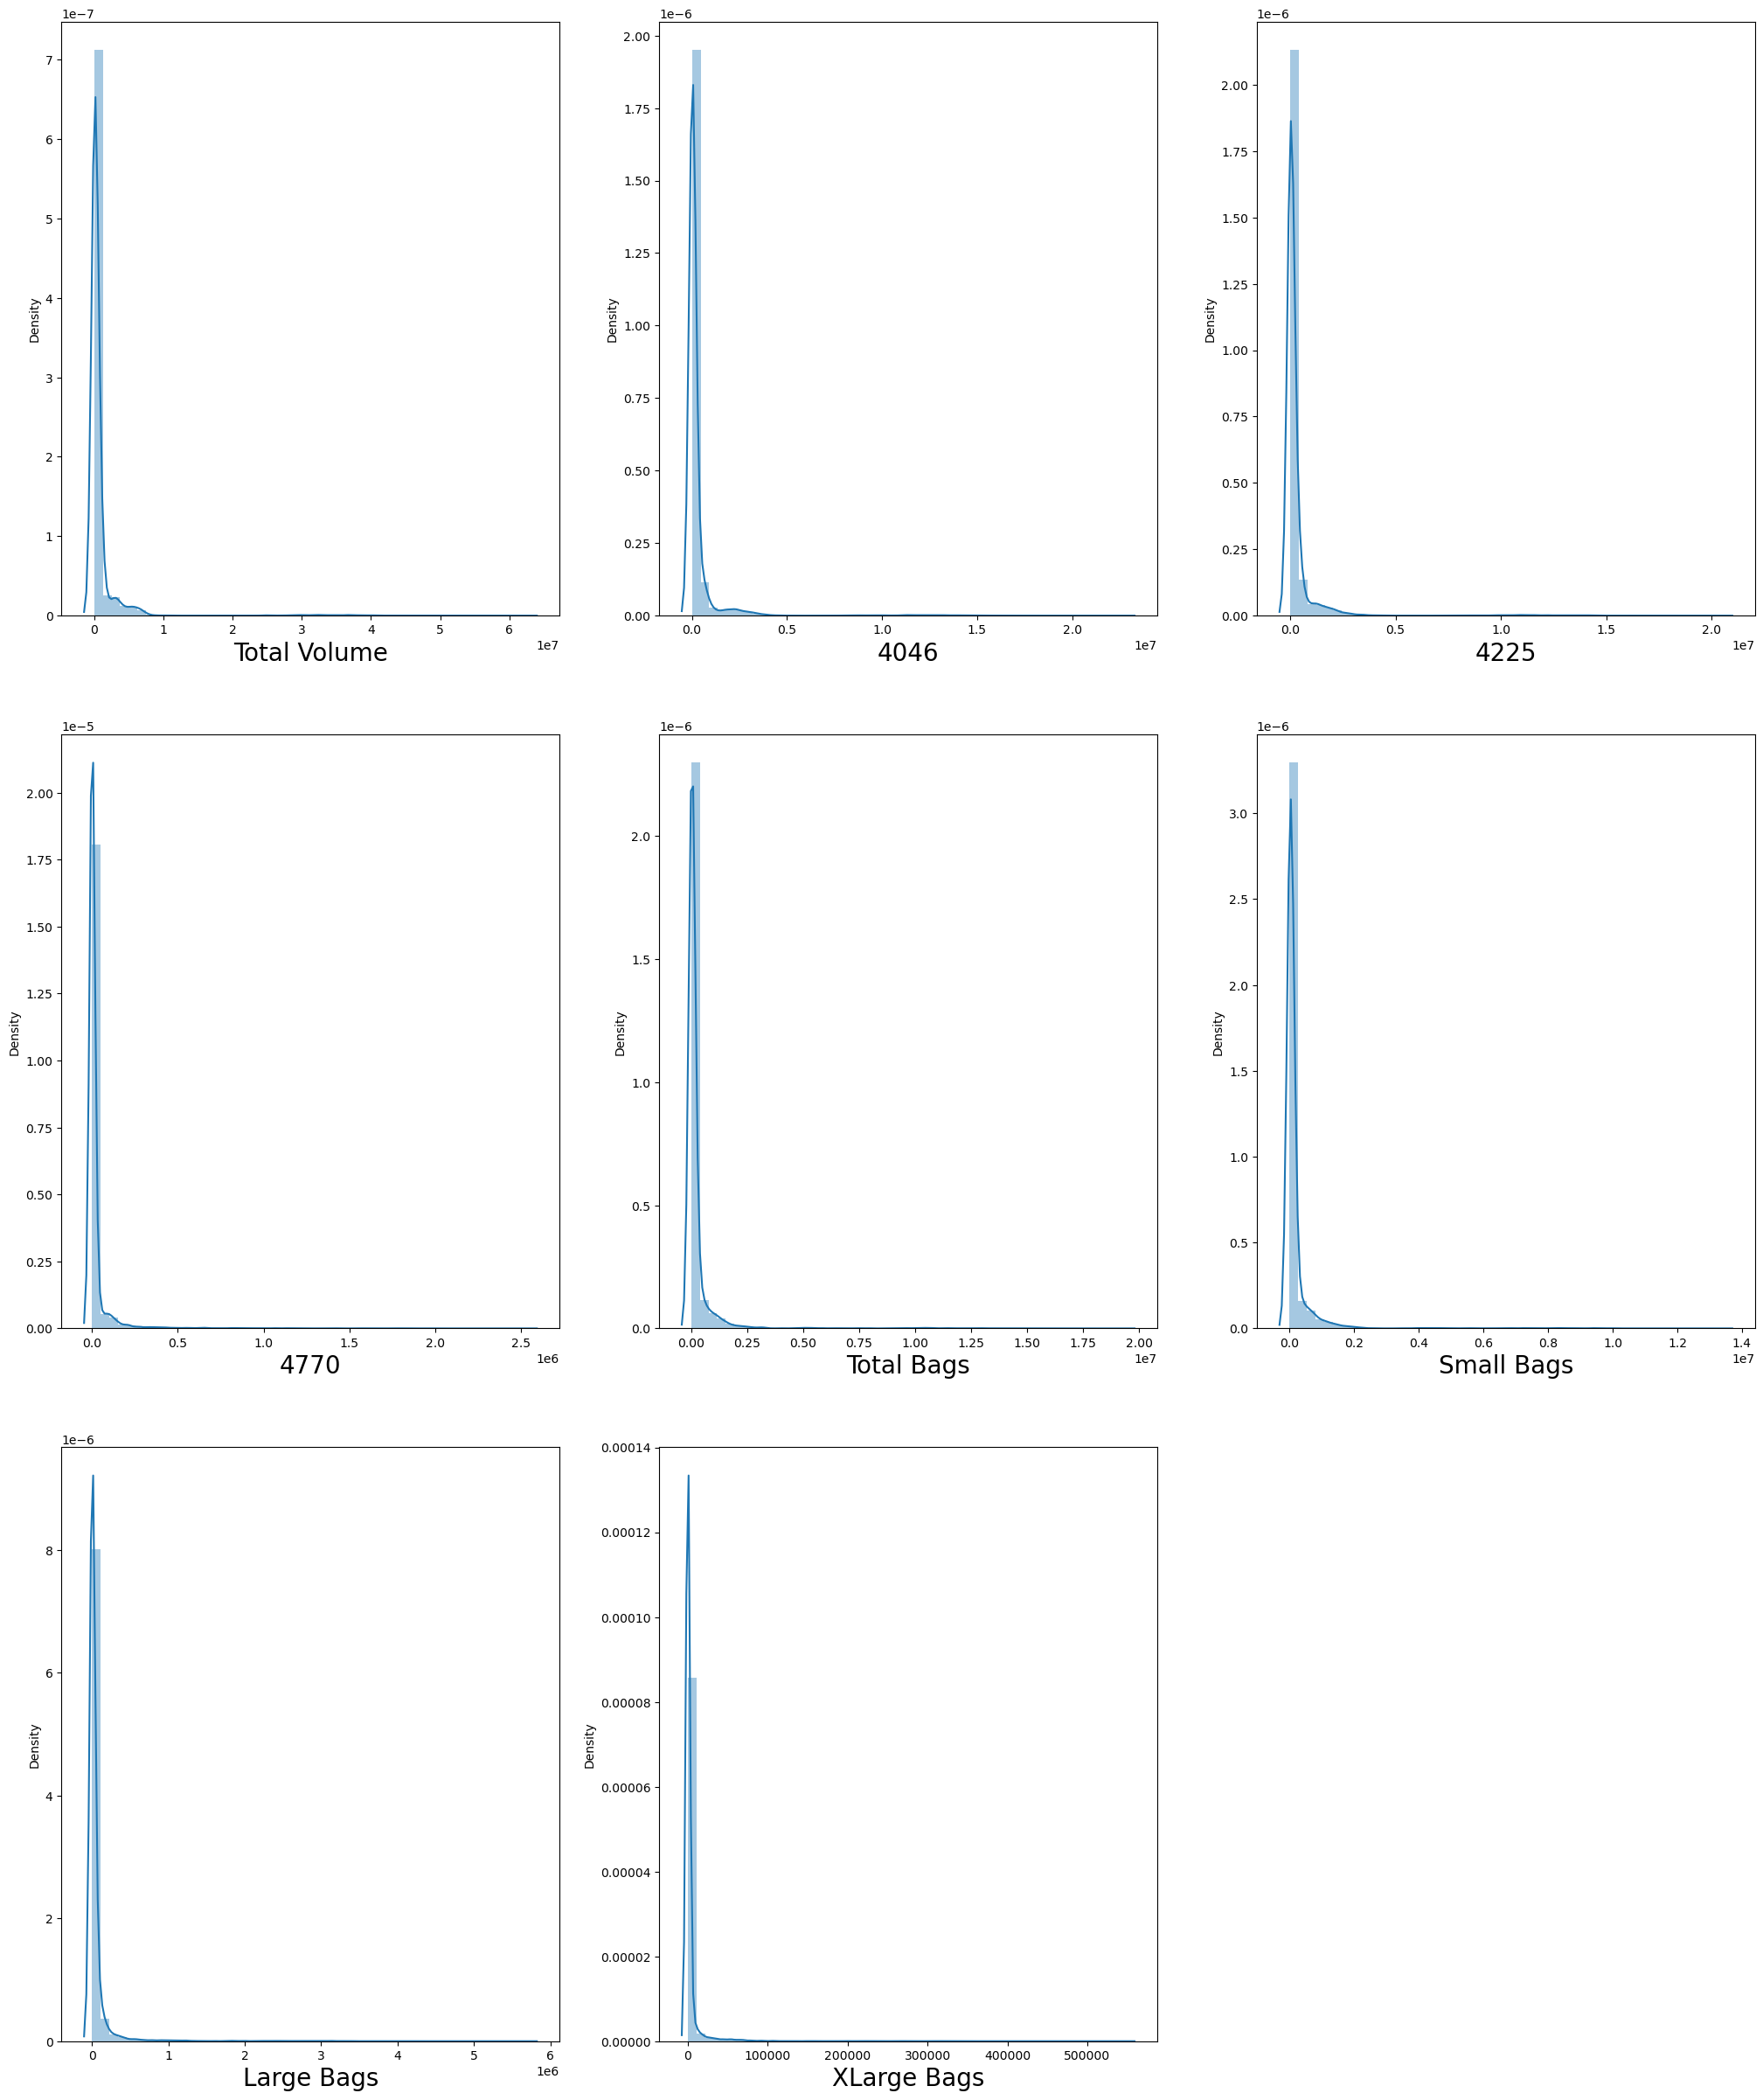

In [45]:
skewed_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in df_new[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding

In [46]:
categorical_colums = ["type","region"]

In [47]:

LE = LabelEncoder()

df_new[categorical_columns] = df_new[categorical_columns].apply(LE.fit_transform)
df_new[categorical_columns]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

### Correlation between features and labels

In [48]:
df_new.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392262      0.629752  0.575152  0.583293  0.617192   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392262  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.629752 -0.800828   
4046            0.799354    0.778765    0.601899     0.575152 -0.725826   
4225            0.818511    0.784901    0.614878     0.583293 -0.747722   
4770            0.761641    0.754305    0.548457     0.617192 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.612530 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.601404 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.451796 -0.500026   
XLarge Bags     0.612530    0.601404    0.451796     1.000000 -0.672461   
type           -0.725686   -0.720466   -0.500026    -0.672461  1.000000   
year            0.210924    0.185955    0.190295     0.156202  0.007399   
region          0.065996    0.051985    0.086573    -0.017598  0.021970   
Day            -0.003703   -0.000535   -0.000876     0.010991 -0.002469   
Month          -0.014571   -0.010260   -0.016942     0.020885 -0.005044   

                  year    region       Day     Month  
AveragePrice  0.099910  0.010428  0.024742  0.157900  
Total Volume  0.076584  0.065709 -0.006248 -0.026332  
4046         -0.002396  0.159390 -0.004558 -0.025919  
4225         -0.004533  0.032273 -0.005919 -0.024708  
4770         -0.051657  0.037805  0.001383 -0.017377  
Total Bags    0.210924  0.065996 -0.003703 -0.014571  
Small Bags    0.185955  0.051985 -0.000535 -0.010260  
Large Bags    0.190295  0.086573 -0.000876 -0.016942  
XLarge Bags   0.156202 -0.017598  0.010991  0.020885  
type          0.007399  0.021970 -0.002469 -0.005044  
year          1.000000 -0.003610  0.004044 -0.173166  
region       -0.003610  1.000000  0.000751  0.002175  
Day           0.004044  0.000751  1.000000  0.010456  
Month        -0.173166  0.002175  0.010456  1.000000

### Correlation between features and labels using Heatmap

<AxesSubplot:>

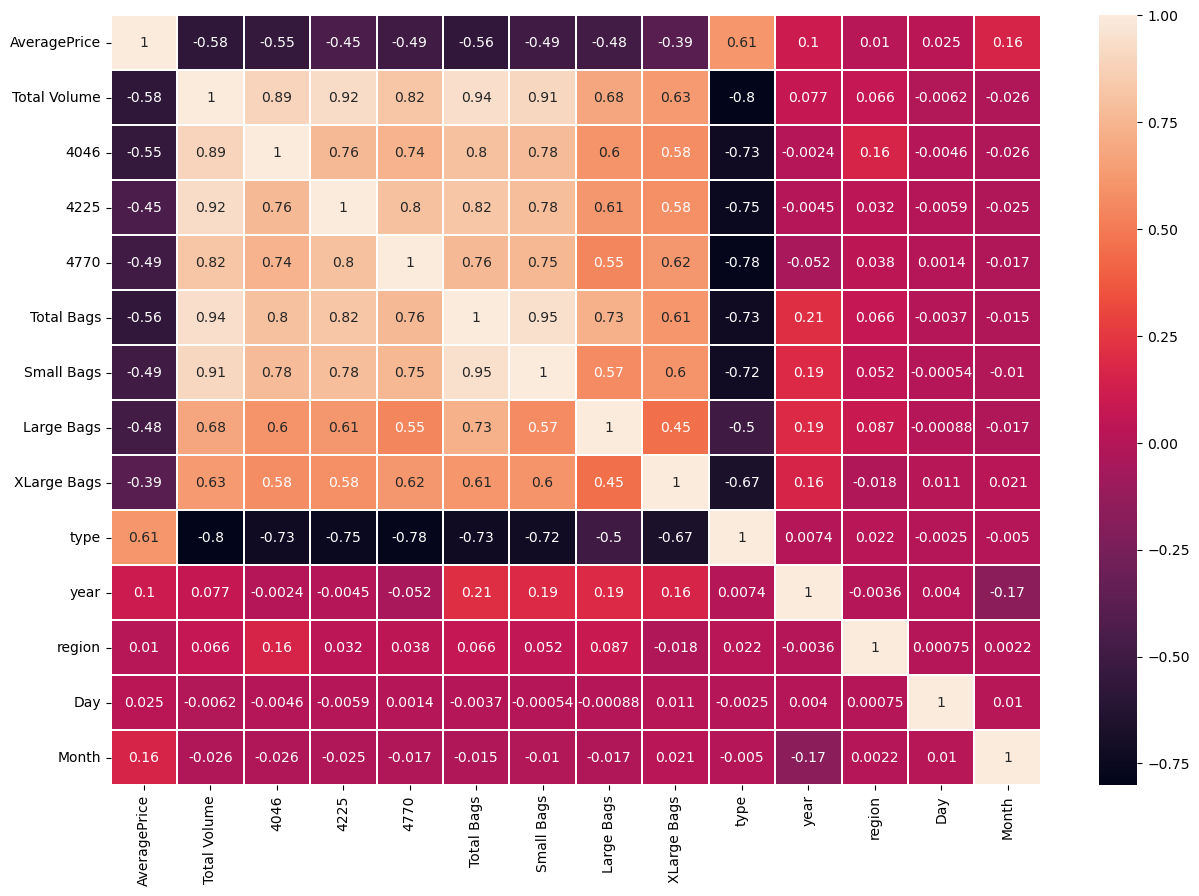

In [75]:
plt.figure(figsize=(15,10))

sns.heatmap(df_new.corr(), linewidths=0.1, annot = True)

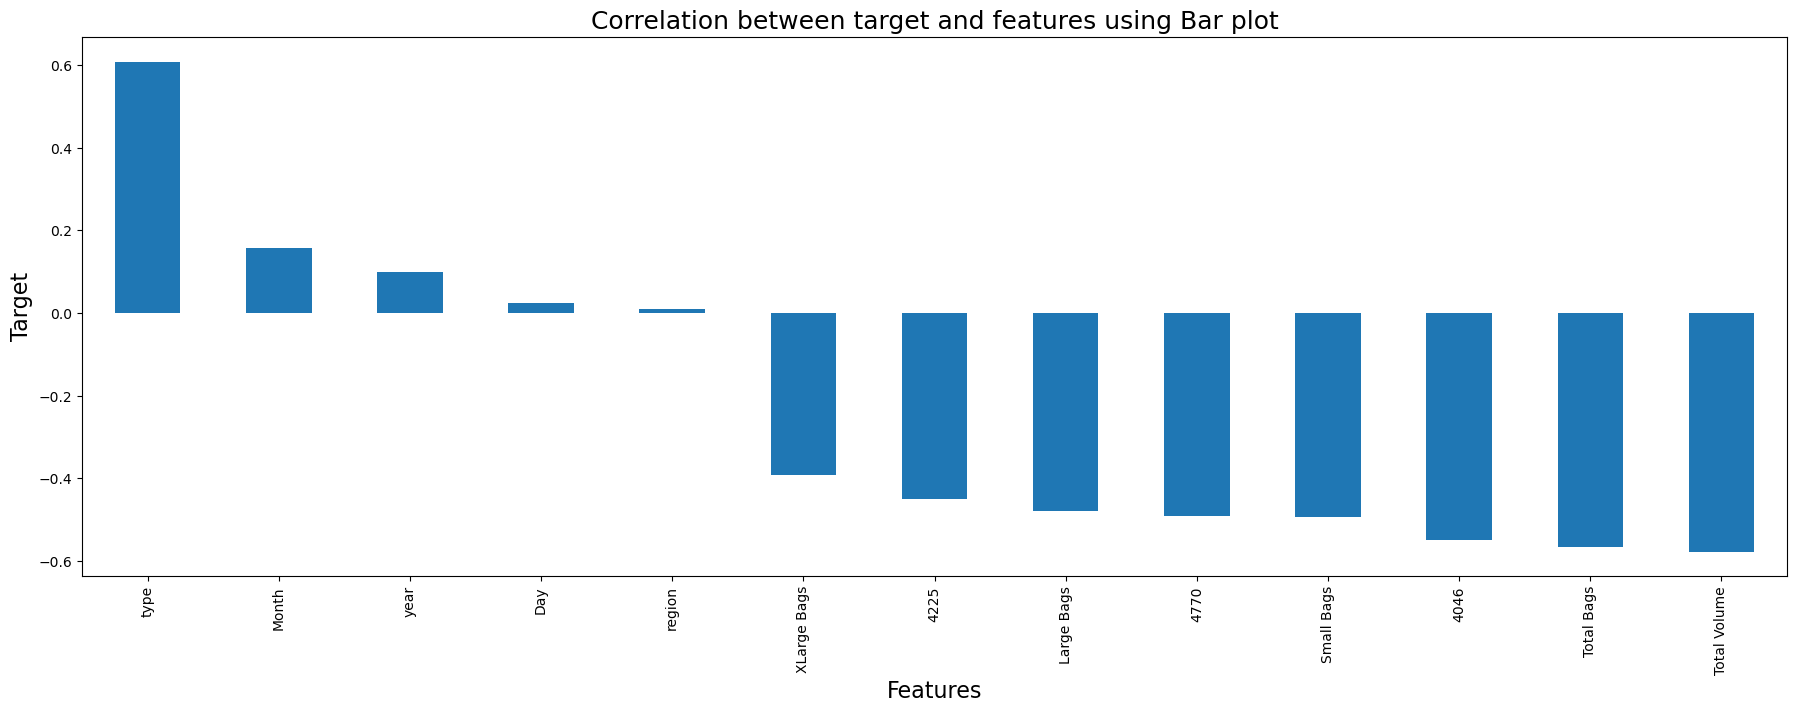

In [76]:
plt.figure(figsize=(22,7))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.title('Correlation between target and features using Bar plot',fontsize=18)
plt.show()

In [49]:
# Now, let's drop the column 'Day'

df_new.drop('Day',axis=1, inplace=True)

df_new.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0   -0.337064   -0.775214    -1.126094     0  2015       0     12  
1   -0.301038   -0.765237    -1.126094     0  2015       0     12  
2   -0.364044   -0.752534    -1.126094     0  2015       0     12  
3   -0.500341   -0.693012    -1.126094     0  2015       0     12  
4   -0.479918   -0.600755    -1.126094     0  2015       0     11

In [50]:
df_new.shape

(17782, 13)

### Seperating dependent and independent variables

In [51]:
x = df_new.drop('AveragePrice', axis=1)

y = df_new['AveragePrice']

In [52]:
x.shape

(17782, 12)

In [53]:
y.shape

(17782,)

### Data Standardization using Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year    region     Month  
0       -0.775214    -0.685946 -1.026443 -1.214908 -1.698613  1.641434  
1       -0.765237    -0.685946 -1.026443 -1.214908 -1.698613  1.641434  
2       -0.752534    -0.685946 -1.026443 -1.214908 -1.698613  1.641434  
3       -0.693012    -0.685946 -1.026443 -1.214908 -1.698613  1.641434  
4       -0.600755    -0.685946 -1.026443 -1.214908 -1.698613  1.358706  
...           ...          ...       ...       ...       ...       ...  
17777   -0.405895    -0.685946  0.974238  1.979143  1.742552 -1.185845  
17778   -0.478556    -0.685946  0.974238  1.979143  1.742552 -1.468572  
17779   -0.945246    -0.685946  0.974238  1.979143  1.742552 -1.468572  
17780   -0.910471    -0.685946  0.974238  1.979143  1.742552 -1.468572  
17781   -1.042930    -0.685946  0.974238  1.979143  1.742552 -1.468572  

[17782 rows x 12 columns]

### Checking VIF values to solve multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

VIF values      Features
0    52.131276  Total Volume
1     7.153485          4046
2    11.169168          4225
3     3.952857          4770
4    34.509723    Total Bags
5    16.635346    Small Bags
6     3.462946    Large Bags
7     2.071298   XLarge Bags
8     3.757728          type
9     1.386245          year
10    1.085387        region
11    1.054160         Month

In [56]:
x.drop('Total Volume', axis=1, inplace=True)

In [57]:
# Now, let's check the VIF again, after removing the column 'ER'

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values     Features
0     3.742061         4046
1     4.283636         4225
2     3.938377         4770
3    24.480097   Total Bags
4    16.635006   Small Bags
5     3.420844   Large Bags
6     2.058386  XLarge Bags
7     3.540936         type
8     1.383804         year
9     1.078624       region
10    1.052101        Month

In [58]:
x.drop('Total Bags', axis=1, inplace=True)

In [59]:
# Now, let's check the VIF again, after removing the column 'RA'

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values     Features
0    3.723365         4046
1    4.138882         4225
2    3.938119         4770
3    4.101853   Small Bags
4    1.866013   Large Bags
5    2.058144  XLarge Bags
6    3.537713         type
7    1.359335         year
8    1.078618       region
9    1.051469        Month

### Finding best random state

In [60]:
from sklearn.neighbors import KNeighborsRegressor as KNN

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu*100," on Random_state ",maxRS)

Maximum r2 score is  87.40110605968503  on Random_state  49


### Train Test Split

In [61]:
# Now, let's split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=49)

### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

LR = LinearRegression()

LR.fit(x_train,y_train)
predLR = LR.predict(x_test)

print('R2_score:',r2_score(y_test,predLR)*100)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))
print("CV score:",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 51.47008353742311
MAE: 0.2181614991496366
MSE: 0.08004250882857523
RMSE: 0.28291784819727306
CV score: 0.08855676789690112


### Ridge Regressor

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

paramsRidge = {'alpha':[0.01, 0.1, 1.0, 10.26], 'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge, paramsRidge)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.01, 'solver': 'sag'}


In [64]:
ridge = Ridge(alpha=0.1, solver='sag')

ridge.fit(x_train, y_train)
ridge.score(x_train, y_train)
pred_ridge = ridge.predict(x_test)

print("R2_score:", r2_score(y_test, pred_ridge)*100)
print("MAE:", metrics.mean_absolute_error(y_test, pred_ridge))
print("MSE:", metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print("CV score:", cross_val_score(ridge,x,y,cv=5).mean())

R2_score: 51.47075355448831
MAE: 0.21816132008466144
MSE: 0.08004140374019335
RMSE: 0.28291589517062016
CV score: 0.08840807399837931


### Lasso Regressor

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

paramsLasso = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state':list(range(0,100))}
lasso = Lasso()
clf = GridSearchCV(lasso, paramsLasso)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [66]:
lasso = Lasso(alpha=0.0001, random_state=0)

lasso.fit(x_train, y_train)
lasso.score(x_train, y_train)
pred_lasso = lasso.predict(x_test)

print("R2_score:", r2_score(y_test, pred_lasso)*100)
print("MAE:", metrics.mean_absolute_error(y_test, pred_lasso))
print("MSE:", metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print("CV score:", cross_val_score(lasso,x,y,cv=5).mean())

R2_score: 51.469659495932326
MAE: 0.21814474024147926
MSE: 0.08004320821870906
RMSE: 0.2829190842249937
CV score: 0.08886026781769936


### Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)

print('R2_Score:', r2_score(y_test,pred_RFR)*100)
print('MAE:', metrics.mean_absolute_error(y_test, pred_RFR))
print('MSE:', metrics.mean_squared_error(y_test, pred_RFR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print("CV score:", cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 88.72915095859828
MAE: 0.09563660731021556
MSE: 0.018589503128397376
RMSE: 0.1363433281403875
CV score: 0.2324544838780525


### KNeighbors Regressor

In [68]:
knn = KNN()

knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print('R2_Score:',r2_score(y_test,predknn)*100)
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))
print("CV score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 87.40110605968503
MAE: 0.10129147141518277
MSE: 0.020779905529522025
RMSE: 0.14415236914293855
CV score -0.01811860375811707


### GradientBoosting Regressor

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGB = GBR.predict(x_test)

print('R2_Score:', metrics.r2_score(y_test,predGB)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predGB))
print('MSE:', metrics.mean_squared_error(y_test, predGB))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predGB)))
print("CV score", cross_val_score(GBR,x,y,cv=5).mean())

R2_Score: 73.98410741912826
MAE: 0.1560348189094327
MSE: 0.042909146839217926
RMSE: 0.20714523127317686
CV score 0.38724228972857533


### Support Vector Machine Regressor

In [70]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(x_train,y_train)
predsvr = svr.predict(x_test)

print('R2_Score:', r2_score(y_test,predsvr)*100)
print('MAE:', metrics.mean_absolute_error(y_test, predsvr))
print('MSE:', metrics.mean_squared_error(y_test, predsvr))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predsvr)))
print("CV score", cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 79.60770496780594
MAE: 0.13423720339992706
MSE: 0.033633902016047976
RMSE: 0.1833954798135657
CV score 0.00795867335328242


<b>From the difference of both R2_score and cross validation score, we can conclude that KNN is the best model.</b>

### Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}


GCV = GridSearchCV(KNN(), parameters, cv=5)

GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [72]:
GCV.best_params_

{'algorithm': 'brute', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [73]:
# Creating the Final Model

Avocado = KNN(algorithm='auto', n_jobs=10, n_neighbors=3, weights='distance')
Avocado.fit(x_train,y_train)
pred = Avocado.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 89.24691864567531
MAE: 0.08947110954068639
MSE: 0.017735526289266137
RMSE: 0.13317479599859028


<b>After Hyperparameter Tuning, the R2_score is 89.24%.</b>

### Saving the Model

In [74]:
import joblib
joblib.dump(mod, 'Avocado_Regression.pkl')

['Avocado_Regression.pkl']

### Loading the model

In [75]:
loadmodel = joblib.load('Avocado_Regression.pkl')

In [76]:
import numpy as np

a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))

df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

Original  Predicted
0         1.19      1.196
1         1.88      1.832
2         1.82      1.800
3         1.04      1.004
4         1.10      1.172
...        ...        ...
5330      1.66      1.754
5331      0.70      0.728
5332      1.54      1.558
5333      1.60      1.618
5334      1.41      1.234

[5335 rows x 2 columns]

### Prediction with Visualization

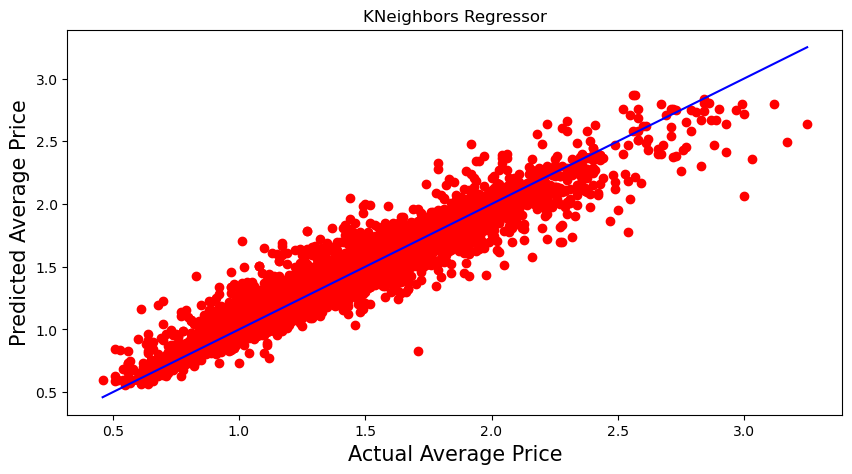

In [77]:
# Now, let's plot the graph of Actual win vs Predicted win

plt.figure(figsize=(10,5))
plt.scatter(y_test, predicted, c='r')
plt1 = max(max(predicted), max(y_test))
plt2 = min(min(predicted), min(y_test))
plt.plot([plt1,plt2], [plt1,plt2], 'b-')
plt.xlabel('Actual Average Price', fontsize=15)
plt.ylabel('Predicted Average Price', fontsize=15)
plt.title("KNeighbors Regressor")
plt.show()

<b>In the graph above, the blue line represents the Actual Average Price and red dots represent the Predicted Average Price.</b>

### We built a Regression Model for predicting the Average Price.

### Now, let's build a Classification Model for predicting the Region.

In [78]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[18249 rows x 14 columns]

### Seperating dependent and independent variables

In [79]:
x_c = df_new.drop('region', axis=1)

y_c = df_new['region']

In [80]:
x_c.shape

(17782, 12)

In [81]:
y_c.shape

(17782,)

### Data Standardization using Standard Scaler

In [82]:
scaler = StandardScaler()
scaler.fit_transform(x_c)
x_c = pd.DataFrame(x_c, columns = x_c.columns)
x_c

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags  type  year  Month  
0       -0.337064   -0.775214    -1.126094     0  2015     12  
1       -0.301038   -0.765237    -1.126094     0  2015     12  
2       -0.364044   -0.752534    -1.126094     0  2015     12  
3       -0.500341   -0.693012    -1.126094     0  2015     12  
4       -0.479918   -0.600755    -1.126094     0  2015     11  
...           ...         ...          ...   ...   ...    ...  
18244   -0.165765   -0.405895    -1.126094     1  2018      2  
18245   -0.321645   -0.478556    -1.126094     1  2018      1  
18246   -0.303466   -0.945246    -1.126094     1  2018      1  
18247   -0.240252   -0.910471    -1.126094     1  2018      1  
18248   -0.201685   -1.042930    -1.126094     1  2018      1  

[17782 rows x 12 columns]

### Train Test Split

In [83]:
# Let's split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=.30, random_state=49)

### Logistic Regression

In [84]:
lr = LogisticRegression()

lr.fit(x_train, y_train)
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))
print(cross_val_score(lr, x_c, y_c, cv=5).mean())

0.20712277413308341
[[31  0  0 ...  0  0  0]
 [ 1 17  0 ...  0  0  2]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ... 18  8  1]
 [ 0  4  6 ...  0  3  6]]
              precision    recall  f1-score   support

           0       0.21      0.27      0.23       114
           1       0.08      0.19      0.11        88
           2       0.17      0.19      0.18        90
           3       0.20      0.14      0.16       102
           4       0.12      0.12      0.12       102
           5       0.05      0.08      0.06       101
           6       0.26      0.28      0.27        85
           7       0.37      0.63      0.47        93
           8       0.55      0.45      0.49       112
           9       0.27      0.32      0.29        98
          10       0.11      0.13      0.12        99
          11       0.20      0.18      0.19       107
          12       0.13      0.24      0.17       107
          13       0.00      0.00      0.00        88
          14 

### Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

DTC.fit(x_train, y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))
print(cross_val_score(DTC,x_c,y_c,cv=5).mean())

0.7865042174320525
[[85  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  2]
 [ 0  0 82 ...  0  0  1]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  2  2 ...  0  0 64]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       114
           1       0.64      0.64      0.64        88
           2       0.85      0.91      0.88        90
           3       0.81      0.78      0.80       102
           4       0.82      0.84      0.83       102
           5       0.67      0.66      0.67       101
           6       0.94      0.91      0.92        85
           7       0.80      0.84      0.82        93
           8       0.93      0.90      0.91       112
           9       0.79      0.80      0.79        98
          10       0.63      0.65      0.64        99
          11       0.82      0.86      0.84       107
          12       0.92      0.87      0.89       107
          13       0.64      0.74      0.69        88
          14  

### KNeighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(x_train, y_train)
predknc=knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))
print(cross_val_score(knc,x_c,y_c,cv=5).mean())

0.5490159325210872
[[90  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  1]
 [ 0  0 69 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  4  2 ...  0  0 35]]
              precision    recall  f1-score   support

           0       0.56      0.79      0.66       114
           1       0.39      0.59      0.47        88
           2       0.50      0.77      0.60        90
           3       0.58      0.74      0.65       102
           4       0.65      0.74      0.69       102
           5       0.48      0.62      0.55       101
           6       0.56      0.75      0.64        85
           7       0.48      0.73      0.58        93
           8       0.82      0.66      0.73       112
           9       0.42      0.50      0.45        98
          10       0.31      0.41      0.35        99
          11       0.55      0.63      0.59       107
          12       0.81      0.66      0.73       107
          13       0.39      0.49      0.43        88
          14  

### Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))
print(cross_val_score(rfc,x_c,y_c,cv=5).mean())

0.9062792877225867
[[106   0   0 ...   0   0   0]
 [  0  64   0 ...   0   0   0]
 [  0   0  89 ...   0   0   0]
 ...
 [  0   0   0 ...  59   0   0]
 [  0   0   0 ...   1  74   0]
 [  0   2   2 ...   0   0  78]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       114
           1       0.74      0.73      0.74        88
           2       0.95      0.99      0.97        90
           3       0.90      0.88      0.89       102
           4       0.95      0.99      0.97       102
           5       0.92      0.78      0.84       101
           6       0.97      1.00      0.98        85
           7       0.88      0.95      0.91        93
           8       0.97      0.96      0.97       112
           9       0.86      0.92      0.89        98
          10       0.81      0.84      0.83        99
          11       0.96      0.96      0.96       107
          12       0.98      0.95      0.97       107
          13       0.82      0.8

### Support Vector Classifier

In [88]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))
print(cross_val_score(svc, x_c, y_c, cv=5).mean())

0.015745079662605434
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        98
          10       0.00      0.00      0.00        99
          11       0.00      0.00      0.00       107
          12       0.00      0.00      0.00       107
          13       0.00      0.00      0.00        88
          14       0.00      0.00      0.00     

### Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier


GBC = GradientBoostingClassifier()

GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)

print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))
print(cross_val_score(GBC, x_c, y_c, cv=5).mean())

0.8271790065604498
[[95  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 84 ...  0  0  1]
 ...
 [ 0  0  0 ... 56  3  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  1  2 ...  0  0 68]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       114
           1       0.63      0.57      0.60        88
           2       0.92      0.93      0.93        90
           3       0.82      0.74      0.78       102
           4       0.89      0.86      0.88       102
           5       0.74      0.74      0.74       101
           6       0.99      0.94      0.96        85
           7       0.86      0.89      0.87        93
           8       0.99      0.94      0.96       112
           9       0.85      0.86      0.85        98
          10       0.70      0.70      0.70        99
          11       0.88      0.85      0.87       107
          12       0.91      0.90      0.90       107
          13       0.70      0.78      0.74        88
          14  

### Plotting ROC-AUC curve for best model

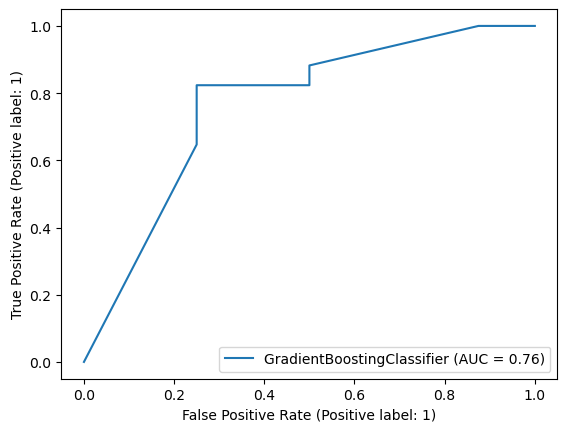

In [90]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection

x,y = datasets.make_classification (random_state=49)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=49)
df = GradientBoostingClassifier(random_state=49)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()